In [34]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [35]:
# Changing the root path
root_path = 'gdrive/My Drive/kaggle/'

In [36]:
# changing the current working directory
%cd /content/gdrive/My Drive/kaggle

/content/gdrive/My Drive/kaggle


In [37]:
!pip install mlens

In [38]:
# importing the required Libraries
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, learning_curve, cross_val_predict
from sklearn.model_selection import cross_val_score
from mlens.visualization import corrmat
from sklearn.feature_selection import RFECV
import traceback

In [39]:
from tensorflow.compat.v1.keras.callbacks import ModelCheckpoint

In [40]:
%%time
# Reading the dataset
data = pd.read_csv('vehicles_db5.csv', index_col = False)

CPU times: user 413 ms, sys: 36.2 ms, total: 450 ms
Wall time: 512 ms


In [41]:
data.drop(data.filter(regex="Unnamed"),axis=1, inplace=True)

In [42]:
data.head()

price      year  ...  paint_color_encoded  state_encoded
0  0.00000  0.745098  ...             0.000000       0.335611
1  0.00308  0.892157  ...             0.371953       0.335611
2  0.00364  0.911765  ...             1.000000       0.335611
3  0.00728  0.960784  ...             0.371953       0.335611
4  0.00788  0.950980  ...             0.371953       0.335611

[5 rows x 18 columns]

In [43]:
data.drop(['year', 'age_of_ad_in_days'], axis = 1, inplace = True)

In [44]:
data.head()

price  condition  ...  paint_color_encoded  state_encoded
0  0.00000        0.2  ...             0.000000       0.335611
1  0.00308        0.4  ...             0.371953       0.335611
2  0.00364        0.6  ...             1.000000       0.335611
3  0.00728        0.6  ...             0.371953       0.335611
4  0.00788        0.6  ...             0.371953       0.335611

[5 rows x 16 columns]

In [45]:
class ErrorHandler:
  def handleErr(self, error):
    return error

In [50]:
import time

class modeler:
    measurement = pd.DataFrame()
    def __init__(self):
        self.errObj = ErrorHandler()
    
    
            
    def splitData(self, data, response):
        try:
            
            predictor = data.drop(response, axis=1)
            target = data[response]

            predictorTrain, predictorTest, targetTrain, targetTest = train_test_split(predictor, target, test_size=0.2,
                                                                                      random_state=0, shuffle=False)
 
                
            return predictorTrain, predictorTest, targetTrain, targetTest
        except Exception as exp:
            err = self.errObj.handleErr(str(exp))
            print(str(err)) 
            traceback.print_exc() 

    def viewImportantFeatures(self, predictorTrain, model, modelName):
        try:
            # Extract feature importances - https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76
            # https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
            sns.set(font_scale = 1.75)
            sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
                           "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
                           'ytick.color': '0.4'})
            
            # Set figure size and create barplot
            f, ax = plt.subplots(figsize=(12, 9))

            featureImportance = pd.DataFrame({'feature': list(predictorTrain.columns),
                               'importance': model.feature_importances_}).sort_values('importance', ascending=False)

            # Display
            #plt.figure(figsize=(10, 10))
            chart = sns.barplot(x='feature', y='importance', data=featureImportance)
            chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
            
            # Generate a bolded horizontal line at y = 0
            #ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)
            
            # Turn frame off
            ax.set_frame_on(False)
            
            # Tight layout
            plt.tight_layout()
            
            # Save Figure
            #plt.savefig("feature_importance.png", dpi = 1080)
            
            #plt.show()
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc() 


    def getModelClassifiers(self):
        try:
            SEED = 30
            rf = RandomForestRegressor(
                    n_estimators=100, max_depth=5, max_features='auto', max_leaf_nodes=50, random_state=SEED,
                    min_samples_split=10, bootstrap='True', criterion='mse')
            #bnb = BernoulliNB()
            #nb = GaussianNB(var_smoothing = 0.25)
            svc = SVR()
            knn = KNeighborsRegressor(n_neighbors=3, leaf_size=30, p=2, weights='uniform', 
                                       algorithm='auto', n_jobs=-1, metric='minkowski')
            #lr = LogisticRegression(solver='liblinear', C=100, random_state=SEED)
            nn = MLPRegressor((80, 10), early_stopping=False, random_state=SEED)
            gb = GradientBoostingRegressor(n_estimators=100, random_state=SEED)
            xgb = XGBRegressor(max_depth = 3, learning_rate=0.1, n_estimators=150, silent=True, objective='reg:squarederror',
                    booster = 'gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0,
                    subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                    base_score=0.5, random_state=SEED, seed=None, missing=None)
            #lda = LinearDiscriminantAnalysis(solver='svd', tol=0.0001)
            #qda = QuadraticDiscriminantAnalysis(reg_param=0.0, store_covariance=False, tol=0.0001)
            ada = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, loss='linear')
            bagging = BaggingRegressor(base_estimator=None, n_estimators=10, max_samples=1.0, 
                                        max_features=1.0, bootstrap=True, bootstrap_features=False, 
                                        oob_score=False, warm_start=False, n_jobs=None)
            etc = ExtraTreesRegressor(n_estimators=100, criterion='mse', max_depth=None, 
                                       min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                       max_features='auto', max_leaf_nodes=None, 
                                       min_impurity_decrease=0.0, min_impurity_split=None, 
                                       bootstrap=False, oob_score=False, n_jobs=-1,)
            ridge = Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, 
                                    max_iter=None, tol=0.001, solver='auto')
            sgd = SGDRegressor(alpha=1.0, penalty='l2')
            #bnb = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
            dtc = DecisionTreeRegressor(criterion='mse', splitter='best')

            """
            models = {'BernoulliNB' : bnb, 'extra trees' : etc, 'ridge' : ridge, 'sgd' : sgd,   
                      'mlp-nn': nn, 'gbm': gb, 'xgb' : xgb, 'lda' : lda, 'qda' : qda, 
                      'random forest': rf, 'bagging' : bagging,  'ada boost' : ada,
                      'knn': knn, 'svm': svc, 'naive bayes': nb, 'DTC' : dtc} """
            
            """ models = { 'bagging' : bagging,  'ada boost' : ada, 'knn': knn, 'DTC' : dtc,
                      'random forest': rf, 'extra trees' : etc,
                      'ridge' : ridge, 'gbm': gb, 'xgb' : xgb, 'mlp-nn': nn, 'svm': SVR
                       }
            """
            
            """ models = { 'bagging' : bagging,  'ada boost' : ada, 'knn': knn
                       }
            """

            models = {'ridge' : ridge, 'sgd' : sgd,  
                      'mlp-nn': nn, 'gbm': gb, 'xgb' : xgb, 
                      'bagging' : bagging,  'ada boost' : ada,
                      'DTC' : dtc, 'knn': knn, 'random forest': rf}

            # models = {'gbm': gb, 'xgb' : xgb}
                       

            return models
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()


    def getModelParam(self):
        try:
            parameters = {}

            parameters.update({"knn": {"n_neighbors": [3,5,11,19],
                                       "p": [1, 2, 3, 4, 5],
                                       "leaf_size": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                                       "n_jobs": [-1],
                                       "weights" : ['uniform', 'distance'],
                                       "metric" : ['euclidean', 'manhattan']
                                       }})
            parameters.update({"svm": {"kernel": ["linear", "rbf", "poly"],
                                       "gamma": ["auto"], "C": [0.1, 0.5, 1, 5, 10, 50, 100],
                                       "degree": [1, 2, 3, 4, 5, 6]
                                       }})
            #parameters.update({"naive bayes": {"var_smoothing": [1e-9, 1e-8,1e-7, 1e-6, 1e-5]
             #                          }})
            parameters.update({"mlp-nn": {"hidden_layer_sizes": [(5), (10), (5,5), (10,10), (5,5,5), (10,10,10)],
                                       "activation": ["identity", "logistic", "tanh", "relu"],
                                       "learning_rate": ["constant", "invscaling", "adaptive"],
                                       "max_iter": [100, 200, 300, 500, 1000, 2000],
                                       "alpha": list(10.0 ** -np.arange(1, 10)),
                                       }})
            parameters.update({"random forest": {"max_features": ["auto", "sqrt", "log2"],
                                                 "max_depth" : [3, 4, 5, 6, 7, 8],
                                                 "min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                                 "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                                 "criterion" :["mse", "mae"]
                                                 }})           
            parameters.update({"gbm": {"learning_rate":[0.15,0.1,0.05,0.01,0.005,0.001], 
                                       "max_depth": [2,3,4,5,6],
                                       "min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                       "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                       "max_features": ["auto", "sqrt", "log2"],
                                       "subsample": [0.8, 0.9, 1]
                                       }})
            parameters.update({"xgb": {"max_depth":range(3,10,2), "min_child_weight":range(1,6,2), 
                                       "gamma":[i/10.0 for i in range(0,5)],
                                       "subsample":[i/10.0 for i in range(6,10)], 
                                       "colsample_bytree":[i/10.0 for i in range(6,10)],
                                       "reg_alpha": [1e-5, 1e-2, 0.1, 1, 100], 
                                       "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.3]
                                       }})            
            #parameters.update({"lda": {"solver": ["svd"], 
             #                         }})
            #parameters.update({"qda": {"reg_param":[0.01*ii for ii in range(0, 101)], 
             #                         }})
            parameters.update({"ada boost": {"learning_rate": [0.001, 0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 1.0]
                                             }})
            parameters.update({"bagging": {"n_estimators": [200],
                                           "max_features": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                           "n_jobs": [-1]
                                           }})
            parameters.update({"extra trees": {"max_features": ["auto", "sqrt", "log2"],
                                               "max_depth" : [3, 4, 5, 6, 7, 8],
                                               "min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                               "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                               "criterion" :["mse", "mae"]     ,
                                               "n_jobs": [-1]
                                               }})
            parameters.update({"ridge": {"alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]
                                         }})
            parameters.update({"sgd": {"alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0],
                                       #"penalty": ["l1", "l2"],
                                       #"n_jobs": [-1]
                                       }})
            #parameters.update({"bernoulli nb": {"alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]
             #                                   }})

            parameters.update({"DTC": {"criterion" :["mse", "mae"],
                                       "splitter": ["best", "random"],
                                       "max_features": ["auto", "sqrt", "log2"],
                                       "max_depth" : [1,2,3, 4, 5, 6, 7, 8],
                                       "min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                       "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                       }})
            
            parameters.update({"extra trees": {"classifier__criterion" :["gini", "entropy"],
                                               "classifier__splitter": ["best", "random"],
                                               "classifier__class_weight": [None, "balanced"],
                                               "classifier__max_features": ["auto", "sqrt", "log2"],
                                               "classifier__max_depth" : [1,2,3, 4, 5, 6, 7, 8],
                                               "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                               "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                               }})  

            """            
            parameters.update({"LSVC": { 
                                        "classifier__penalty": ["l2"],
                                        "classifier__C": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]
                                         }})
            
            parameters.update({"NuSVC": { 
                                        "classifier__nu": [0.25, 0.50, 0.75],
                                        "classifier__kernel": ["linear", "rbf", "poly"],
                                        "classifier__degree": [1,2,3,4,5,6],
                                         }})
            
       
            # Update dict with Decision Tree Classifier

            """            
            return parameters
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()

    def regressEnsemble(self, estimators, predictorTrain, targetTrain, predictorTest, targetTest):
        try:
            # https://www.datacamp.com/community/tutorials/ensemble-learning-python
            votingCLF = VotingRegressor(estimators=estimators, n_jobs=-1)
            votingCLF.fit(predictorTrain, targetTrain)
            predictions = votingCLF.predict(predictorTest)
            self.getMAPE(targetTest, pd.Series(predictions), 'Ensemble')
            
            # metrics.plot_roc_curve(models[m], predictorTest, targetTest)
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()



    def regressMultipleModels(self, predictorTrain, predictorTest, targetTrain, targetTest, forecastPeriod):
        try:
            # https://mlfromscratch.com/gridsearch-keras-sklearn/#/
            # https://www.dataquest.io/blog/introduction-to-ensembles/ 
            kFold = 2
            modelList = self.getModelClassifiers()
            
            modelPredictions = np.zeros((targetTest.shape[0], len(modelList))) 
            modelPredictions = pd.DataFrame(modelPredictions)

            cvPredictions = np.zeros((targetTest.shape[0], len(modelList))) 
            cvPredictions = pd.DataFrame(cvPredictions)
            
            rscvPredictions = np.zeros((targetTest.shape[0], len(modelList))) 
            rscvPredictions = pd.DataFrame(rscvPredictions)
            
            rfecvPredictions = np.zeros((targetTest.shape[0], len(modelList))) # not applicable for 'knn', 'svm', 'naive bayes', 'mlp-nn', 'qda', 'bagging'
            rfecvPredictions = pd.DataFrame(rfecvPredictions)
            
            modelProbabilities = np.zeros((targetTest.shape[0], len(modelList))) # not applicable for ridge and SGD
            modelProbabilities = pd.DataFrame(modelProbabilities)
            
            self.measurement = pd.DataFrame(columns = ['Model', 'Techniques', 'MapeMean', 'R2', 'R2Score', 'MSE', 'MAE']) 
            
            modelParamGrids = self.getModelParam()
            print("Fitting models.")
            #probCols = list()
            #predCols = list()
            cols = list()
            estimators = list()
            estimatorToDrop = ['bernoulli nb']
            bestRSEstimators = list()
            ensembleEstimators = list() # estimators which support ensemble are copied from bestRSEstimators
            bestRSParams = list()
            
            # bestRSScores = list()
            cvScores = list()
            rfeEstimators = list()
            # train and predict each model with all features
            for i, (name, m) in enumerate(modelList.items()):
                time.sleep(20)
                # build model with all features and without CV
                #
                print("%s...\n" % name, end=" ", flush=False)

                if (name == 'svm'):
                    m = SVR()
                
                m.fit(predictorTrain, targetTrain)
                    
                    
                modelPredictions.iloc[:, i] = m.predict(predictorTest)
                #predCols.append(name)
                
                #cols.append(name)
                modelPredictions = modelPredictions.rename(columns={i: name})
                mapeMean, r2, r2Score, mse, mae = self.getMAPE(targetTest, pd.Series(modelPredictions[name]), 'model without CV ' + name) 
                # mapeMean, r2, r2Score, mse, mae = self.getMAPE(targetTest[0:forecastPeriod], modelPredictions[name][0:forecastPeriod]) 
                self.measurement = self.measurement.append({'Model' : name, 'Techniques' : 'All Feature without CV', 
                                          'MapeMean' : mapeMean, 'R2' : r2, 'R2Score' : r2Score, 
                                         'MSE' : mse, 'MAE' : mae},
                                         ignore_index = True) 
                
                #estimators.append((name,m)) # do not delete extra bracket. It converts each item in the list into tuple
                print("done")
                #
                # build model with hyper parameter tuning and with CV
                if name not in ['knn', 'random forest']:
                  paramGrid = modelParamGrids[name]
                  bestRSEstimator, bestRSParam, rsPrediction = self.randomizedSearch(paramGrid, m, predictorTrain, 
                                              targetTrain, predictorTest, targetTest, name)
                  rscvPredictions.iloc[:, i] = rsPrediction
                  rscvPredictions = rscvPredictions.rename(columns={i: name})
                  bestRSEstimators.append((name, bestRSEstimator))
                  bestRSParams.append(bestRSParam)
                  
                  mapeMean, r2, reScore, mse, mae = self.getMAPE(targetTest, pd.Series(rscvPredictions[name]), 'Hyper parameter tuned model ' + name) 
                  self.measurement = self.measurement.append({'Model' : name, 'Techniques' : 'Randomized Search with CV', 
                                            'MapeMean' : mapeMean, 'R2' : r2, 'R2Score' : r2Score, 
                                          'MSE' : mse, 'MAE' : mae},
                                          ignore_index = True) 
                  
                  #
                  # predict with cross_val_predict with CV
                  #
                  #kFold = StratifiedKFold(shuffle=True, random_state=50)
                  cvPredictions.iloc[:, i] = cross_val_predict(bestRSEstimator, predictorTest, targetTest, cv=kFold)
                  cvPredictions = cvPredictions.rename(columns={i: name})
                  cvScores.append((name, cross_val_score(bestRSEstimator, predictorTest, targetTest, cv=kFold)))
                  #self.modelMetrics(targetTest, cvPredictions)
                  
                  mapeMean, r2, r2Score, mse, mae = self.getMAPE(targetTest, pd.Series(cvPredictions[name]), 'cross val predict with CV model ' + name) 
                  self.measurement = self.measurement.append({'Model' : name, 'Techniques' : 'Cross val with CV', 
                                            'MapeMean' : mapeMean, 'R2' : r2, 'R2Score' : r2Score, 
                                          'MSE' : mse, 'MAE' : mae},
                                          ignore_index = True) 
                

                #
                # predict with recursive feature elimination and CV
                #
                if (name in ['gbm', 'xgb']):
                    rfeCV = RFECV(estimator=bestRSEstimator, step=1, cv=kFold, scoring='r2')
                    rfeCV.fit(predictorTrain, targetTrain)
    
                    rfecvPredictions.iloc[:, i] = rfeCV.predict(predictorTest)
                    rfeCVPredictions = rfecvPredictions.rename(columns={i: name})
                    
                    mapeMean, r2, r2Score, mse, mae = self.getMAPE(targetTest, pd.Series(rfeCVPredictions[name]), 'RFECV model ' + name) 
                    self.measurement = self.measurement.append({'Model' : name, 'Techniques' : 'RFE with CV', 
                                          'MapeMean' : mapeMean, 'R2' : r2, 'R2Score' : r2Score, 
                                         'MSE' : mse, 'MAE' : mae},
                                         ignore_index = True) 
                    
                    plt.figure(figsize=(16, 9))
                    plt.title('Recursive Feature Elimination with Cross-Validation - ' + name, fontsize=18, fontweight='bold', pad=20)
                    plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
                    plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
                    plt.plot(range(1, len(rfeCV.grid_scores_) + 1), rfeCV.grid_scores_, color='#303F9F', linewidth=3)
                    
                    plt.show() 

                #
                # Visualize
                #
                if (name in ['xgb', 'gbm']):
                    print('Optimal number of features: {}'.format(rfeCV.n_features_))
                    rfeCV.estimator_.feature_importances_
                    self.viewImportantFeatures(predictorTrain, m, name)
                    self.viewImportantFeatures(predictorTrain, bestRSEstimator, name)
                    self.viewImportantFeatures(predictorTrain.iloc[:,0:rfeCV.n_features_], rfeCV.estimator_, name)
              

                # Update classifier parameters
                #tuned_params = {item[12:]: best_params[item] for item in best_params}
                #classifier.set_params(**tuned_params)


            
            self.visualizeScoreComparison(self.measurement)
            
            corrmat(modelPredictions.corr(), inflate=False)
            corrmat(rscvPredictions.corr(), inflate=False)
            corrmat(cvPredictions.corr(), inflate=False)
            #corrmat(rfecvPredictions.corr(), inflate=False)
            
            
            for i in range((len(bestRSEstimators))): # some models are not applicable for ensemble. They need to be dropped from bestRSEstimators
                if bestRSEstimators[i][0] not in estimatorToDrop: #[i][0] returns model name
                    ensembleEstimators.append(bestRSEstimators[i])
                    #del bestRSEstimators[i]
                print (i)     
            self.regressEnsemble(ensembleEstimators, predictorTrain, targetTrain, predictorTest, targetTest)
            
            print("Done.\n")
            #return modelPredictions, modelProbabilities, rscvPredictions, cvPredictions, rfecvPredictions, bestRSEstimators
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()

    def randomizedSearch(self, paramGrid, m, predictorTrain, targetTrain, predictorTest, targetTest, name):
        try:
            # train and predict each model with grid search CV
            """{'extra trees' : etc, 'ridge' : ridge, 'sgd' : sgd,   
                      'mlp-nn': nn, 'gbm': gb, 'xgb' : xgb, 
                      'random forest': rf, 'bagging' : bagging,  'ada boost' : ada,
                      'knn': knn, 'svm': svc, 'DTC' : dtc}"""

            if name in ['mlp-nn', 'xgb', 'random forest', 'knn', 'bagging', 'ada boost', 'svm', 'DTC']:
              kFold = 2
              iter_count = 2
            else:
              kFold = 2
              iter_count = 2

            #kFold = StratifiedKFold(shuffle=True, random_state=50)
            #gscv = GridSearchCV(m, param_grid=paramGrid, cv = kFold,  n_jobs= -1, verbose = 1, scoring = "roc_auc")
            rscv = RandomizedSearchCV(m, param_distributions=paramGrid, n_jobs=-1, scoring='r2', cv=kFold,
                                n_iter=iter_count, verbose=1, random_state=30)  
            # Fit gscv
            print(f"Now tuning {m}.")
            rscv.fit(predictorTrain, np.ravel(targetTrain))  
            prediction = rscv.best_estimator_.predict(predictorTest)
            #rscvPredictions = rscvPredictions.rename(columns={i: name})
            
            #auc = metrics.roc_auc_score(targetTest, prediction)
            #bestRSParams.append(rscv.best_params_)
            bestParams = rscv.best_params_
            
          
            self.plotLearningCurve(rscv.best_estimator_, 'Learning Curves', predictorTrain, targetTrain, 
                        cv = kFold, n_jobs = -1)
            #bestRSScores.append(rscv.best_score_)
            return rscv.best_estimator_, rscv.best_params_, prediction
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()
            

    def plotLearningCurve(self, estimator, title, train, test, ylim = None, cv = None,
                        n_jobs = -1, trainSizes = np.linspace(0.1, 1.0, 5)):
        try:
            plt.figure()
            plt.title(title)
            if ylim is not None:
                plt.ylim(*ylim)
            plt.xlabel("Training examples")
            plt.ylabel("Score")
            trainSizes, trainScores, testScores = learning_curve(estimator, train, test, cv = cv,
                                                                 n_jobs = n_jobs, train_sizes = trainSizes)
            trainScoresMean = np.mean(trainScores, axis=1)
            trainScoresSTD = np.std(trainScores, axis=1)
            testScoresMean = np.mean(testScores, axis=1)
            testScoresSTD = np.std(testScores, axis=1)
            plt.grid()
        
            plt.fill_between(trainSizes, trainScoresMean - trainScoresSTD,
                             trainScoresMean + trainScoresSTD, alpha=0.1, color="r")
            plt.fill_between(trainSizes, testScoresMean - testScoresSTD,
                             testScoresMean + testScoresSTD, alpha=0.1, color="g")
            plt.plot(trainSizes, trainScoresMean, 'o-', color="r", label="Training score")
            plt.plot(trainSizes, testScoresMean, 'o-', color="g", label="Cross-validation score")
        
            plt.legend(loc="best")
            plt.show()
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()

    def visualizeScoreComparison(self, measurement):
        try:
            print('comparision of all models')
            print(measurement)
            measurement.to_csv('metrics_dbscan.csv')
            # Set graph style
            sns.set(font_scale = 1.75)
            sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})
    
            # Colors
            training_color = sns.color_palette("RdYlBu", 10)[1]
            test_color = sns.color_palette("RdYlBu", 10)[-2]
            colors = [training_color, test_color]
            
            # Set figure size and create barplot
            f, ax = plt.subplots(figsize=(12, 9))
            
            sns.barplot(x="MapeMean", y="Model", hue="Techniques", palette = colors,
                        data=measurement)
            
            # Generate a bolded horizontal line at y = 0
            ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)
            
            # Turn frame off
            ax.set_frame_on(False)
            
            # Tight layout
            plt.tight_layout()
            plt.show()
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()


    def MLPRegress(self, trainData, testData, forecastPeriod, colName):
        try:
            # https://github.com/neelabhpant/Deep-Learning-in-Python/blob/master/ClimateChange_Prediction.ipynb
            
            
            predictorTrain, targetTrain = self.makePredictorTarget(trainData[colName], forecastPeriod)
            predictorTest, targetTest = self.makePredictorTarget(testData[colName], forecastPeriod)

            def buildNN(neurons1=32, neurons2=16, activation = 'linear', dropoutRate = 0.2, optimizer = 'Adam', initMode='uniform', learnRate=0.0001, momentum = 0.0, weightConstraint=0.0):
                model = Sequential()
                model.add(Dense(neurons1,input_dim = forecastPeriod,kernel_initializer = initMode, activation = activation, kernel_constraint=maxnorm(weightConstraint)))
                #model.add(Dropout(dropoutRate))
                model.add(Dense(neurons2,input_dim = 16,kernel_initializer = initMode, activation = activation))
                model.add(Dropout(dropoutRate))
                model.add(Dense(1, activation = activation))
                
                adam = SGD(lr = learnRate, momentum = momentum)
                model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
                return model

            
            inputLayer = Input(shape=(forecastPeriod,), dtype='float32') 
            dense1 = Dense(32, activation='linear')(inputLayer) 
            dense2 = Dense(16, activation='linear')(dense1) 
            #dense3 = Dense(16, activation='linear')(dense2) 
            dropoutLayer = Dropout(0.6)(dense2) 
            outputLayer = Dense(1, activation='linear')(dropoutLayer) 
            
            model = Model(inputs=inputLayer, outputs=outputLayer) 
            model.compile(loss='mean_squared_error', optimizer='adam') 
            model.summary() 
            
            #model = KerasClassifier(build_fn=buildNN, epochs=100, batch_size=10, verbose=0)
            #kFold = StratifiedKFold(shuffle=True, random_state=50)
            #cross_val_score(model, predictorTrain, targetTrain, cv=5)
            #CVPredictions = cross_val_predict(model, predictorTest, targetTest, cv=3, n_jobs=-1)
            
            checkpointPath = os.path.join('keras_models', 'model.{epoch:02d}-{val_loss:.4f}.hdf5') 
            #save_weights_at = os.path.join('model.h5') 
            earlyStopCallback = EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
            saveBest = ModelCheckpoint(filepath=checkpointPath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=True, mode='min') 
            
            history = model.fit(x=predictorTrain, y=targetTrain, batch_size=16, epochs=20, callbacks=[earlyStopCallback, saveBest],
                                verbose=1, validation_data=(predictorTest, targetTest), shuffle=True) 
            
            visualizeLoss(history, "Training and Validation Loss")
            #best_model = load_model(os.path.join('keras_models', 'PRSA_data_Air_Pressure_MLP_weights.18-94530.7887.hdf5')) 
            predictions = model.predict(predictorTest) 
            predictions = pd.DataFrame(predictions)
            predictions = predictions.loc[:,0]
            
            #testData[colName + 'Predict'] = predictions
            #predictions = scaler.inverse_transform(predictions)
            #predictions = np.squeeze(predictions)
 
            r2 = r2_score(testData[colName].loc[forecastPeriod:], predictions) 
            print('R-squared for the test data set:', round(r2,4)) 
            
            mae = mean_absolute_error(testData[colName].loc[forecastPeriod:], predictions)
            print('MAE for the test data set:', round(mae, 4))
            
            
            plt.figure(figsize=(5.5, 5.5)) 
            plt.plot(range(50), testData[colName].loc[forecastPeriod:56], linestyle='-', marker='*', color='r') 
            plt.plot(range(50), predictions[:50], linestyle='-', marker='.', color='b') 
            plt.legend(['Actual','Predicted'], loc=2) 
            plt.title('Actual vs Predicted - ' + colName) 
            plt.ylabel(colName) 
            plt.xlabel('Index') 
            plt.show()
            
            return predictions, r2, mae, model
        except Exception as exp:
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc() 

    def visualizeLoss(history, title):
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        epochs = range(len(loss))
        plt.figure()
        plt.plot(epochs, loss, "b", label="Training loss")
        plt.plot(epochs, val_loss, "r", label="Validation loss")
        plt.title(title)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

    def getMAPE(self, actual, predicted, name):
            try:
                actual.reset_index(drop=True, inplace=True)
                predicted.reset_index(drop=True, inplace=True)
                yActual, yPredicted = np.array(actual), np.array(predicted)
                MAPE = (np.abs((yActual - yPredicted) / yActual)) * 100
                #mapeMean = np.mean(np.abs((yActual - yPredicted) / yActual)) * 100
                mapeMean = 100/len(yActual) * np.sum(2 * np.abs(yPredicted - yActual) / (np.abs(yActual) + np.abs(yPredicted)))
    
                actualDF = pd.DataFrame({'Actual': actual, 'Predicted': predicted, 'MAPE': MAPE})
                df1 = actualDF.head(50)
                print(df1)
                fig, ax = plt.subplots()
                ax = sns.scatterplot(x="Actual", y="Predicted", data=actualDF.drop(['MAPE'], axis = 1))
                ax.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=4)
                ax.set_xlabel('Actual')
                ax.set_ylabel('Predicted')
                ax.set_title("Actual vs Predicted - "+name)
    
                plt.show()
                df1.drop(['MAPE'], axis = 1, inplace = True)
                df1.plot(kind='bar', figsize=(15, 8), title = 'Actual vs Predicted - '+name, color = ['green', 'red'])
                #plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
                #plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
                plt.show()
    
                from sklearn.metrics import mean_squared_error, r2_score


                mse = mean_squared_error(actual, predicted)

                r2Score = r2_score(actual, predicted)
                
                r2 = r2_score(actual, predicted) 
            
                mae = mean_absolute_error(actual, predicted)

                
                return mapeMean, r2, r2Score, mse, mae
            except Exception as exp:
                self.errObj = ErrorHandler()
                err = self.errObj.handleErr(str(exp))
                print(str(err))
                traceback.print_exc()

In [51]:
model = modeler()

In [52]:
predictorTrain, predictorTest, targetTrain, targetTest = model.splitData(data,'price')

Fitting models.
ridge...
       Actual  Predicted       MAPE
0   0.490000   0.382732  21.891270
1   0.498000   0.393705  20.942697
2   0.499800   0.450028   9.958362
3   0.499800   0.442556  11.453289
4   0.499800   0.436165  12.732128
5   0.499800   0.372170  25.536125
6   0.499800   0.529393   5.921069
7   0.499900   0.326647  34.657585
8   0.510000   0.355698  30.255411
9   0.519801   0.371685  28.494731
10  0.519901   0.386882  25.585359
11  0.538002   0.516261   4.040924
12  0.538002   0.562294   4.515255
13  0.538002   0.562294   4.515255
14  0.539802   0.663590  22.932251
15  0.539802   0.694206  28.603877
16  0.539802   0.530740   1.678726
17  0.539802   0.658263  21.945350
18  0.539802   0.565527   4.765803
19  0.539902   0.312400  42.137618
20  0.550002   0.411364  25.206857
21  0.551802   0.505242   8.437908
22  0.556002   0.571858   2.851788
23  0.558002   0.439441  21.247383
24  0.558002   0.442639  20.674270
25  0.559802   0.399469  28.641086
26  0.559802   0.587547   4.9

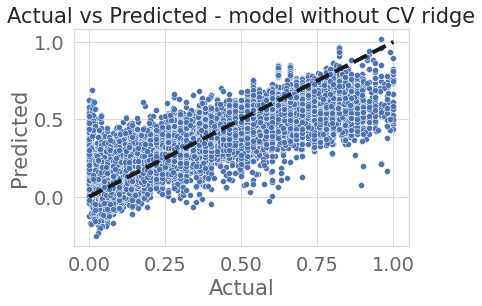

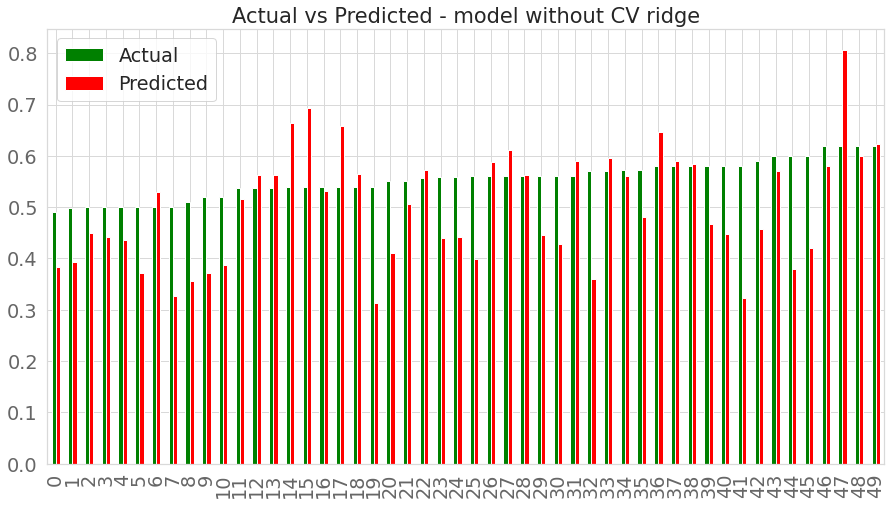

done
Now tuning Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.3s finished


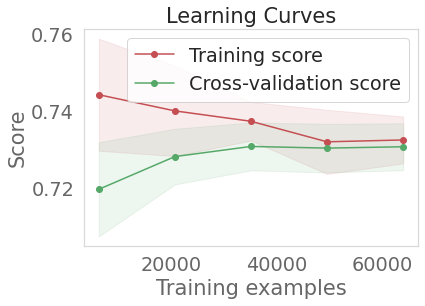

      Actual  Predicted       MAPE
0   0.490000   0.382760  21.885714
1   0.498000   0.393681  20.947543
2   0.499800   0.450062   9.951565
3   0.499800   0.442591  11.446307
4   0.499800   0.436200  12.724989
5   0.499800   0.372190  25.532142
6   0.499800   0.529461   5.934585
7   0.499900   0.326696  34.647759
8   0.510000   0.355726  30.249849
9   0.519801   0.371705  28.490890
10  0.519901   0.386903  25.581408
11  0.538002   0.516281   4.037240
12  0.538002   0.562328   4.521606
13  0.538002   0.562328   4.521606
14  0.539802   0.663663  22.945735
15  0.539802   0.694307  28.622551
16  0.539802   0.530865   1.655550
17  0.539802   0.658401  21.970922
18  0.539802   0.565531   4.766493
19  0.539902   0.312470  42.124682
20  0.550002   0.411342  25.210882
21  0.551802   0.505233   8.439529
22  0.556002   0.571906   2.860366
23  0.558002   0.439423  21.250604
24  0.558002   0.442679  20.667219
25  0.559802   0.399485  28.638132
26  0.559802   0.587634   4.971739
27  0.559802   0.612

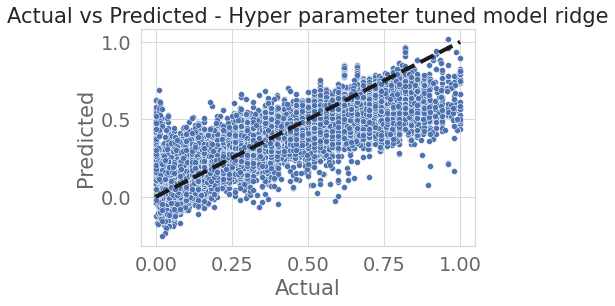

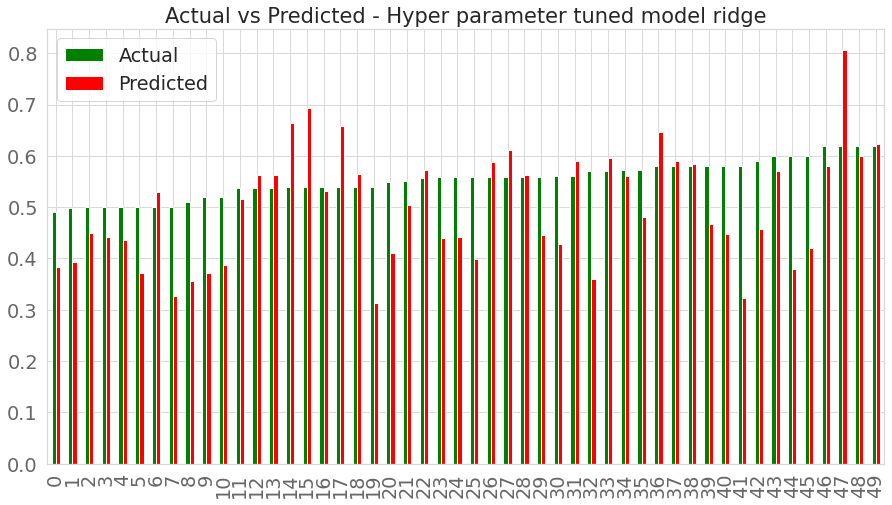

      Actual  Predicted       MAPE
0   0.490000   0.395116  19.364055
1   0.498000   0.408154  18.041328
2   0.499800   0.441923  11.579936
3   0.499800   0.434227  13.119797
4   0.499800   0.427643  14.437076
5   0.499800   0.367353  26.499929
6   0.499800   0.528745   5.791341
7   0.499900   0.335033  32.980092
8   0.510000   0.373521  26.760604
9   0.519801   0.366853  29.424257
10  0.519901   0.389423  25.096601
11  0.538002   0.520383   3.274896
12  0.538002   0.565322   5.078081
13  0.538002   0.565322   5.078081
14  0.539802   0.658006  21.897717
15  0.539802   0.672783  24.635204
16  0.539802   0.518969   3.859363
17  0.539802   0.658114  21.917847
18  0.539802   0.563476   4.385730
19  0.539902   0.320734  40.593925
20  0.550002   0.420138  23.611488
21  0.551802   0.502768   8.886125
22  0.556002   0.586186   5.428681
23  0.558002   0.456822  18.132535
24  0.558002   0.458898  17.760501
25  0.559802   0.395472  29.355009
26  0.559802   0.596089   6.481967
27  0.559802   0.607

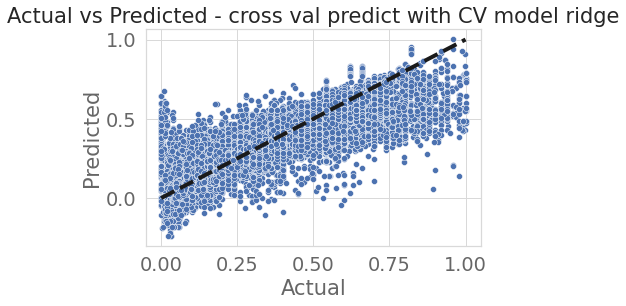

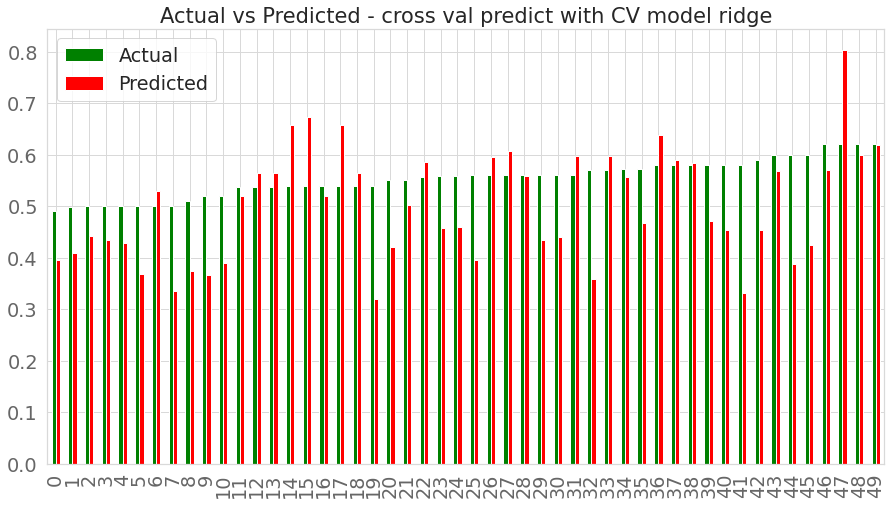

sgd...
       Actual  Predicted       MAPE
0   0.490000   0.257138  47.522843
1   0.498000   0.276327  44.512701
2   0.499800   0.283582  43.260888
3   0.499800   0.283122  43.352924
4   0.499800   0.282729  43.431657
5   0.499800   0.280844  43.808735
6   0.499800   0.287065  42.564116
7   0.499900   0.261102  47.769158
8   0.510000   0.261030  48.817780
9   0.519801   0.280814  45.976603
10  0.519901   0.270185  48.031396
11  0.538002   0.280226  47.913505
12  0.538002   0.281668  47.645451
13  0.538002   0.281668  47.645451
14  0.539802   0.282930  47.586284
15  0.539802   0.287799  46.684241
16  0.539802   0.282718  47.625633
17  0.539802   0.278194  48.463579
18  0.539802   0.279862  48.154706
19  0.539902   0.257033  52.392671
20  0.550002   0.266498  51.546065
21  0.551802   0.274574  50.240425
22  0.556002   0.281649  49.343830
23  0.558002   0.280433  49.743372
24  0.558002   0.259814  53.438533
25  0.559802   0.282525  49.531371
26  0.559802   0.281710  49.676904
27  0.559802

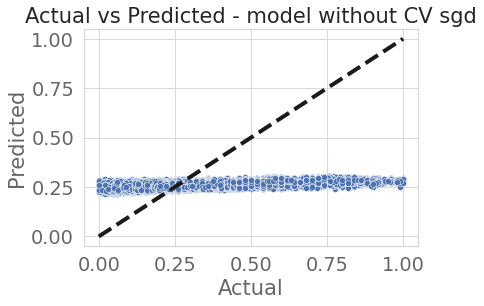

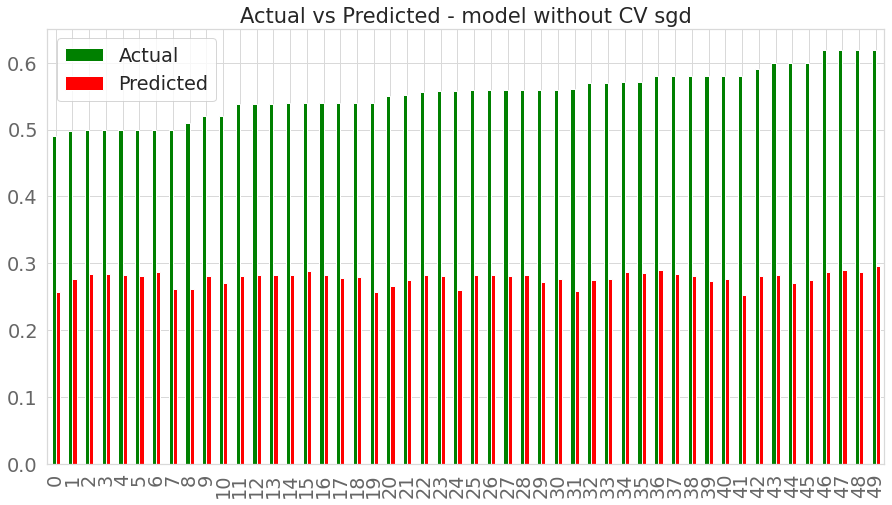

done
Now tuning SGDRegressor(alpha=1.0, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished


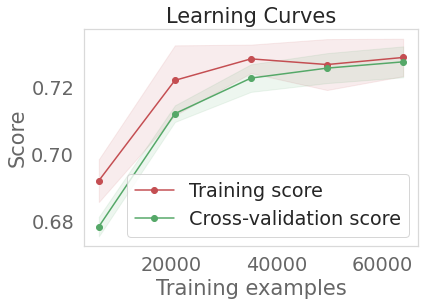

      Actual  Predicted       MAPE
0   0.490000   0.383205  21.794856
1   0.498000   0.399193  19.840691
2   0.499800   0.453295   9.304674
3   0.499800   0.445634  10.837443
4   0.499800   0.439081  12.148655
5   0.499800   0.373003  25.369450
6   0.499800   0.527671   5.576389
7   0.499900   0.325705  34.845905
8   0.510000   0.354316  30.526266
9   0.519801   0.372506  28.336833
10  0.519901   0.388020  25.366437
11  0.538002   0.522603   2.862159
12  0.538002   0.569038   5.768921
13  0.538002   0.569038   5.768921
14  0.539802   0.672545  24.591149
15  0.539802   0.700484  29.766911
16  0.539802   0.527505   2.277898
17  0.539802   0.657848  21.868503
18  0.539802   0.569516   5.504768
19  0.539902   0.309359  42.700902
20  0.550002   0.415861  24.389149
21  0.551802   0.508909   7.773210
22  0.556002   0.575336   3.477192
23  0.558002   0.443242  20.566291
24  0.558002   0.442527  20.694442
25  0.559802   0.400993  28.368833
26  0.559802   0.589766   5.352465
27  0.559802   0.615

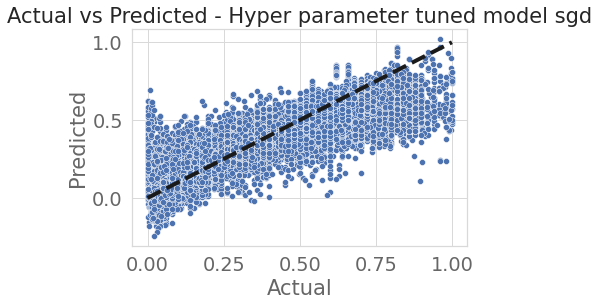

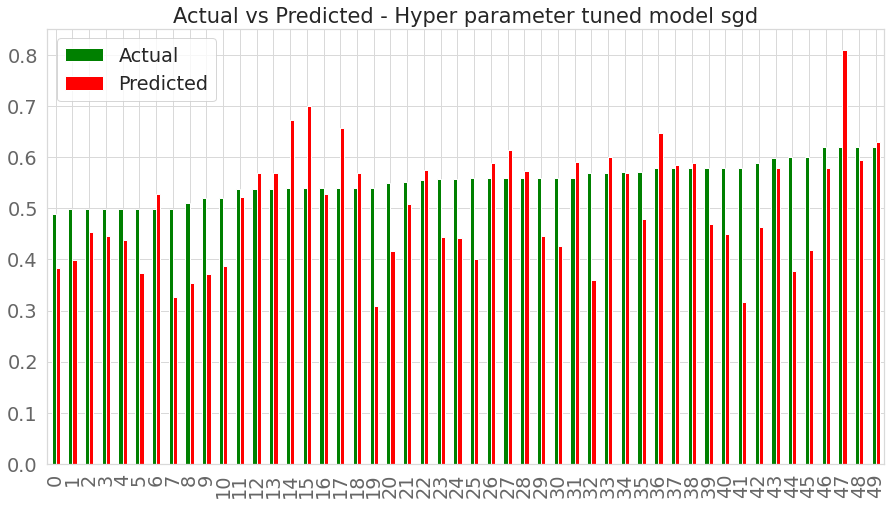

      Actual  Predicted       MAPE
0   0.490000   0.389500  20.510200
1   0.498000   0.436232  12.403267
2   0.499800   0.422702  15.425770
3   0.499800   0.413875  17.191948
4   0.499800   0.406323  18.702832
5   0.499800   0.362399  27.491203
6   0.499800   0.496174   0.725419
7   0.499900   0.310701  37.847345
8   0.510000   0.378653  25.754315
9   0.519801   0.361825  30.391528
10  0.519901   0.394666  24.088254
11  0.538002   0.513775   4.503047
12  0.538002   0.546923   1.658204
13  0.538002   0.546923   1.658204
14  0.539802   0.603981  11.889491
15  0.539802   0.605411  12.154351
16  0.539802   0.429521  20.429758
17  0.539802   0.565706   4.798802
18  0.539802   0.582192   7.852939
19  0.539902   0.283169  47.551654
20  0.550002   0.455637  17.157262
21  0.551802   0.535643   2.928488
22  0.556002   0.561559   0.999386
23  0.558002   0.486699  12.778354
24  0.558002   0.446925  19.906293
25  0.559802   0.394651  29.501784
26  0.559802   0.534853   4.456792
27  0.559802   0.528

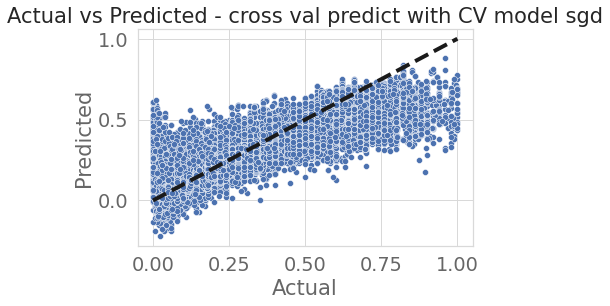

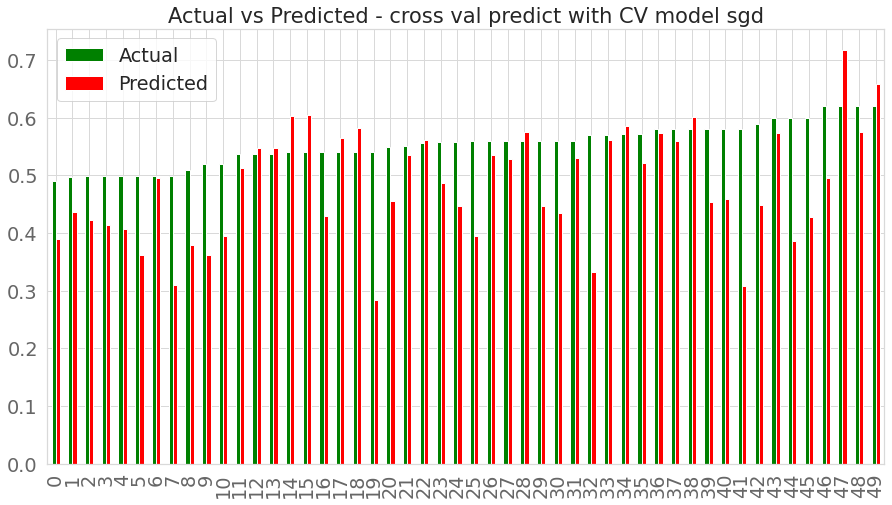

mlp-nn...
       Actual  Predicted       MAPE
0   0.490000   0.513412   4.778017
1   0.498000   0.417825  16.099373
2   0.499800   0.368670  26.236559
3   0.499800   0.358224  28.326452
4   0.499800   0.350193  29.933460
5   0.499800   0.321421  35.690105
6   0.499800   0.563660  12.777158
7   0.499900   0.452118   9.558340
8   0.510000   0.459058   9.988715
9   0.519801   0.320919  38.261178
10  0.519901   0.521921   0.388495
11  0.538002   0.486001   9.665482
12  0.538002   0.513979   4.465228
13  0.538002   0.513979   4.465228
14  0.539802   0.590991   9.483023
15  0.539802   0.633147  17.292597
16  0.539802   0.480457  10.993861
17  0.539802   0.806811  49.464368
18  0.539802   0.582381   7.888049
19  0.539902   0.447474  17.119344
20  0.550002   0.467681  14.967377
21  0.551802   0.504295   8.609385
22  0.556002   0.652824  17.413973
23  0.558002   0.558063   0.010859
24  0.558002   0.569366   2.036534
25  0.559802   0.349639  37.542389
26  0.559802   0.492141  12.086654
27  0.559

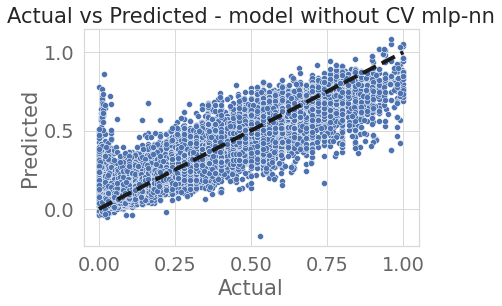

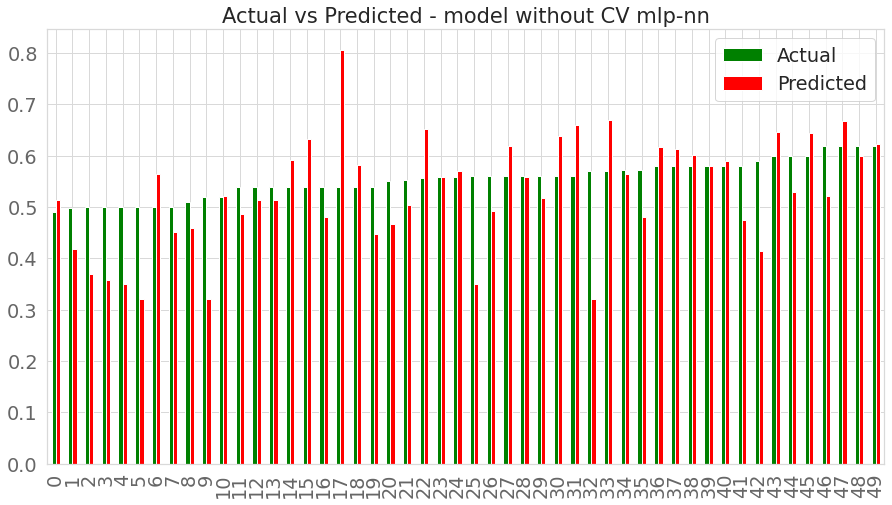

done
Now tuning MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(80, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=30, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   11.9s finished


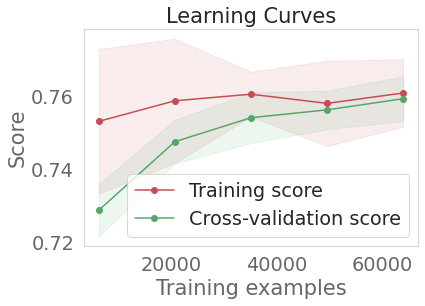

      Actual  Predicted       MAPE
0   0.490000   0.407574  16.821513
1   0.498000   0.392485  21.187831
2   0.499800   0.376789  24.612085
3   0.499800   0.368337  26.303051
4   0.499800   0.361172  27.736683
5   0.499800   0.319989  35.976665
6   0.499800   0.525297   5.101461
7   0.499900   0.316327  36.721898
8   0.510000   0.386612  24.193700
9   0.519801   0.319472  38.539447
10  0.519901   0.382503  26.427776
11  0.538002   0.514478   4.372349
12  0.538002   0.565016   5.021343
13  0.538002   0.565016   5.021343
14  0.539802   0.648340  20.107129
15  0.539802   0.636097  17.839003
16  0.539802   0.503110   6.797316
17  0.539802   0.713039  32.092881
18  0.539802   0.555298   2.870816
19  0.539902   0.302556  43.960871
20  0.550002   0.411174  25.241388
21  0.551802   0.496401  10.039990
22  0.556002   0.620169  11.540678
23  0.558002   0.474977  14.878970
24  0.558002   0.477122  14.494673
25  0.559802   0.349687  37.533932
26  0.559802   0.581738   3.918428
27  0.559802   0.615

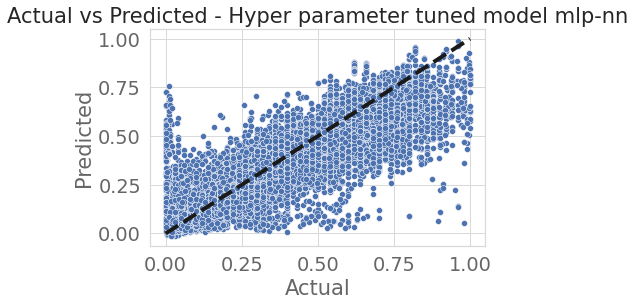

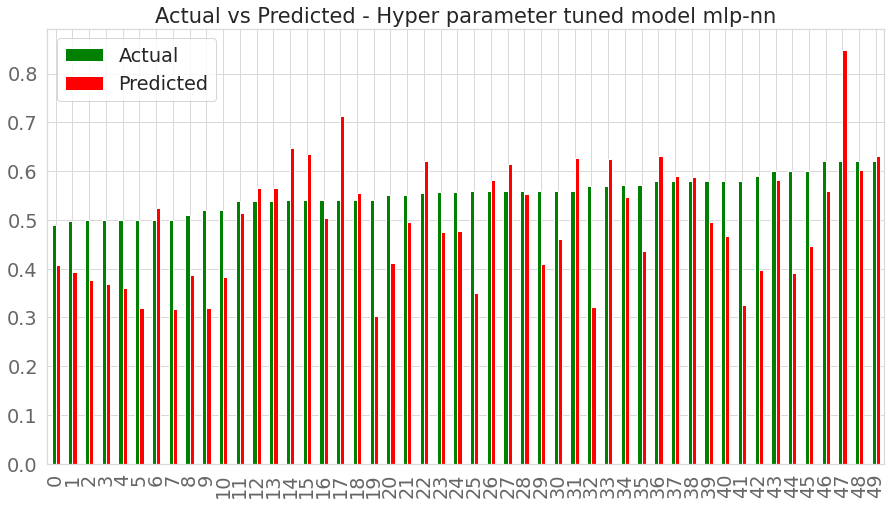

      Actual  Predicted       MAPE
0   0.490000   0.409094  16.511362
1   0.498000   0.418500  15.963839
2   0.499800   0.414795  17.007774
3   0.499800   0.404503  19.066963
4   0.499800   0.395753  20.817734
5   0.499800   0.346590  30.654164
6   0.499800   0.544678   8.979097
7   0.499900   0.335941  32.798405
8   0.510000   0.402731  21.033219
9   0.519801   0.345954  33.444973
10  0.519901   0.401785  22.718836
11  0.538002   0.518880   3.554216
12  0.538002   0.564947   5.008378
13  0.538002   0.564947   5.008378
14  0.539802   0.676534  25.330042
15  0.539802   0.682683  26.469154
16  0.539802   0.501062   7.176692
17  0.539802   0.688775  27.597811
18  0.539802   0.563776   4.441332
19  0.539902   0.317916  41.115927
20  0.550002   0.437216  20.506477
21  0.551802   0.505781   8.340052
22  0.556002   0.611857  10.045705
23  0.558002   0.488524  12.451317
24  0.558002   0.484780  13.122140
25  0.559802   0.382995  31.583831
26  0.559802   0.596987   6.642422
27  0.559802   0.610

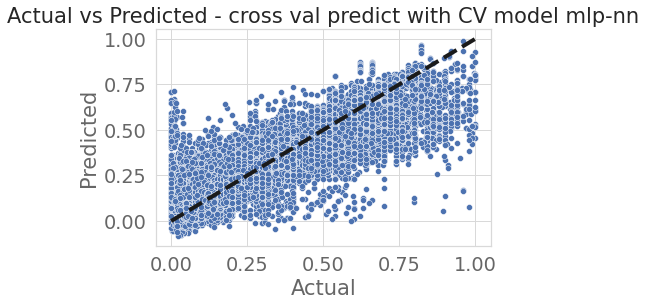

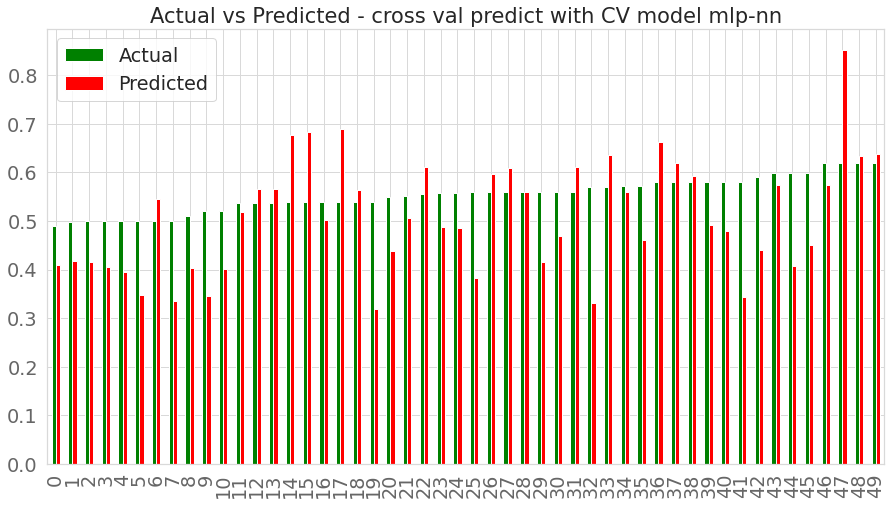

gbm...
       Actual  Predicted       MAPE
0   0.490000   0.526647   7.478999
1   0.498000   0.357777  28.157240
2   0.499800   0.356431  28.685179
3   0.499800   0.335130  32.947264
4   0.499800   0.335130  32.947264
5   0.499800   0.313097  37.355490
6   0.499800   0.556959  11.436414
7   0.499900   0.325332  34.920594
8   0.510000   0.482532   5.385919
9   0.519801   0.313097  39.765914
10  0.519901   0.437635  15.823408
11  0.538002   0.486702   9.535214
12  0.538002   0.512514   4.737472
13  0.538002   0.512514   4.737472
14  0.539802   0.599421  11.044616
15  0.539802   0.598401  10.855721
16  0.539802   0.544517   0.873565
17  0.539802   0.745691  38.141703
18  0.539802   0.606923  12.434407
19  0.539902   0.399273  26.047046
20  0.550002   0.370677  32.604439
21  0.551802   0.558796   1.267527
22  0.556002   0.592384   6.543451
23  0.558002   0.453206  18.780548
24  0.558002   0.535138   4.097597
25  0.559802   0.368105  34.243823
26  0.559802   0.437299  21.883263
27  0.559802

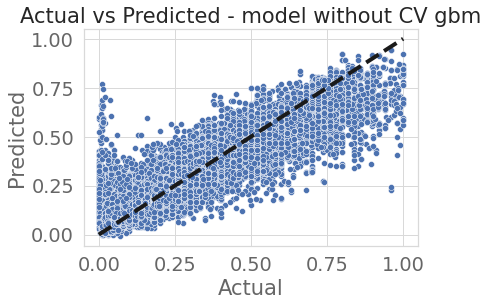

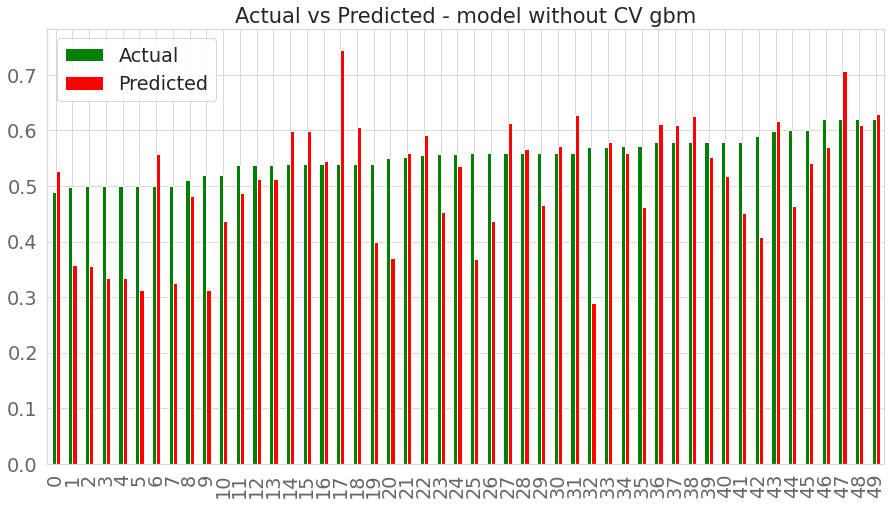

done
Now tuning GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=30, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    8.5s finished


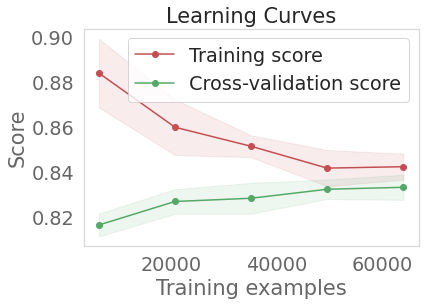

      Actual  Predicted       MAPE
0   0.490000   0.511141   4.314549
1   0.498000   0.401061  19.465652
2   0.499800   0.438287  12.307606
3   0.499800   0.432149  13.535614
4   0.499800   0.432149  13.535614
5   0.499800   0.301252  39.725462
6   0.499800   0.536149   7.272802
7   0.499900   0.367590  26.467211
8   0.510000   0.469265   7.987375
9   0.519801   0.301252  42.044695
10  0.519901   0.433520  16.614878
11  0.538002   0.504570   6.214105
12  0.538002   0.506409   5.872184
13  0.538002   0.506409   5.872184
14  0.539802   0.614718  13.878485
15  0.539802   0.617046  14.309745
16  0.539802   0.576811   6.856123
17  0.539802   0.696893  29.101722
18  0.539802   0.595899  10.392266
19  0.539902   0.416913  22.779899
20  0.550002   0.393499  28.455060
21  0.551802   0.552629   0.149825
22  0.556002   0.620146  11.536577
23  0.558002   0.488892  12.385383
24  0.558002   0.536907   3.780469
25  0.559802   0.370289  33.853545
26  0.559802   0.510830   8.748171
27  0.559802   0.627

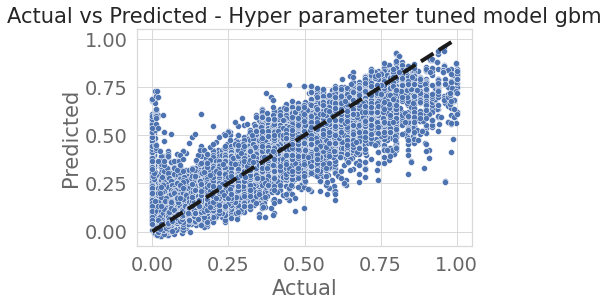

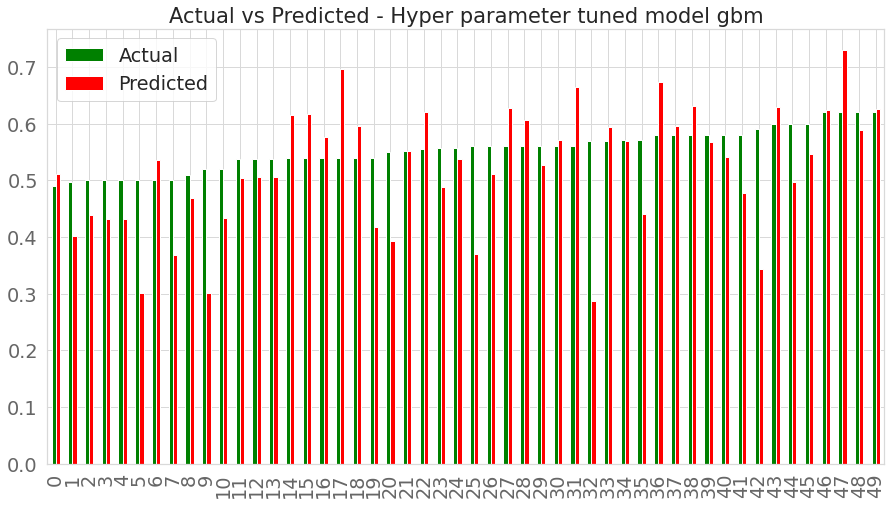

      Actual  Predicted       MAPE
0   0.490000   0.551207  12.491227
1   0.498000   0.447787  10.082938
2   0.499800   0.406876  18.592148
3   0.499800   0.408230  18.321372
4   0.499800   0.408230  18.321372
5   0.499800   0.300260  39.924009
6   0.499800   0.545991   9.241844
7   0.499900   0.391093  21.765798
8   0.510000   0.502099   1.549373
9   0.519801   0.300260  42.235602
10  0.519901   0.523900   0.769164
11  0.538002   0.493018   8.361265
12  0.538002   0.516783   3.943906
13  0.538002   0.516783   3.943906
14  0.539802   0.633083  17.280716
15  0.539802   0.622881  15.390751
16  0.539802   0.570260   5.642478
17  0.539802   0.659113  22.102864
18  0.539802   0.590848   9.456593
19  0.539902   0.442679  18.007464
20  0.550002   0.400813  27.125246
21  0.551802   0.564052   2.220013
22  0.556002   0.693695  24.764722
23  0.558002   0.524991   5.915932
24  0.558002   0.604985   8.419888
25  0.559802   0.336364  39.913855
26  0.559802   0.560609   0.144104
27  0.559802   0.659

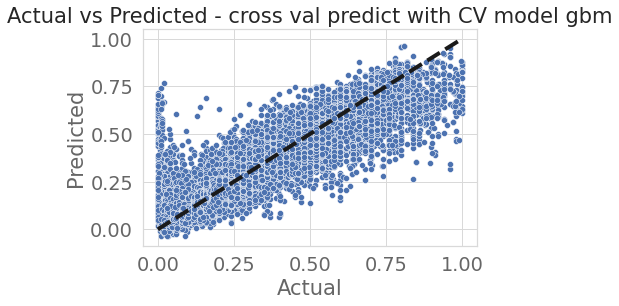

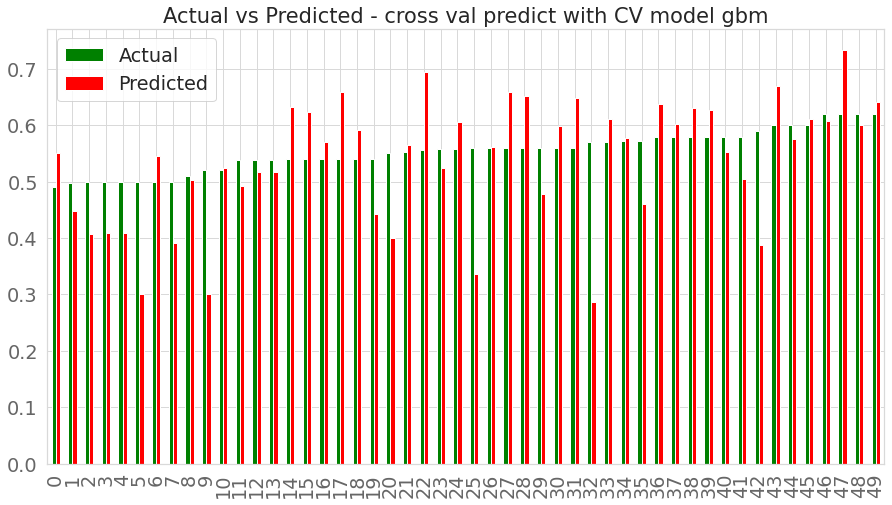

      Actual  Predicted       MAPE
0   0.490000   0.489603   0.080940
1   0.498000   0.399717  19.735612
2   0.499800   0.383282  23.312951
3   0.499800   0.384033  23.162762
4   0.499800   0.381052  23.759085
5   0.499800   0.302594  39.456963
6   0.499800   0.535623   7.167515
7   0.499900   0.399487  20.086583
8   0.510000   0.435629  14.582634
9   0.519801   0.302594  41.786527
10  0.519901   0.482882   7.120311
11  0.538002   0.489435   9.027299
12  0.538002   0.489435   9.027299
13  0.538002   0.489435   9.027299
14  0.539802   0.596739  10.547751
15  0.539802   0.632123  17.102762
16  0.539802   0.527939   2.197640
17  0.539802   0.738757  36.857109
18  0.539802   0.584259   8.235797
19  0.539902   0.426475  21.008746
20  0.550002   0.397176  27.786446
21  0.551802   0.531644   3.653071
22  0.556002   0.614381  10.499666
23  0.558002   0.490222  12.146897
24  0.558002   0.536813   3.797408
25  0.559802   0.344668  38.430346
26  0.559802   0.506392   9.541009
27  0.559802   0.611

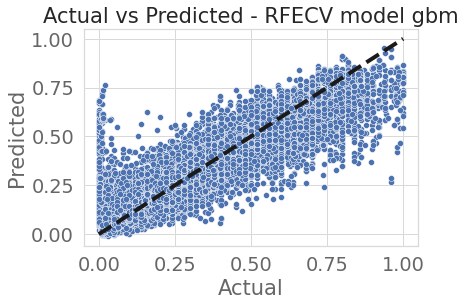

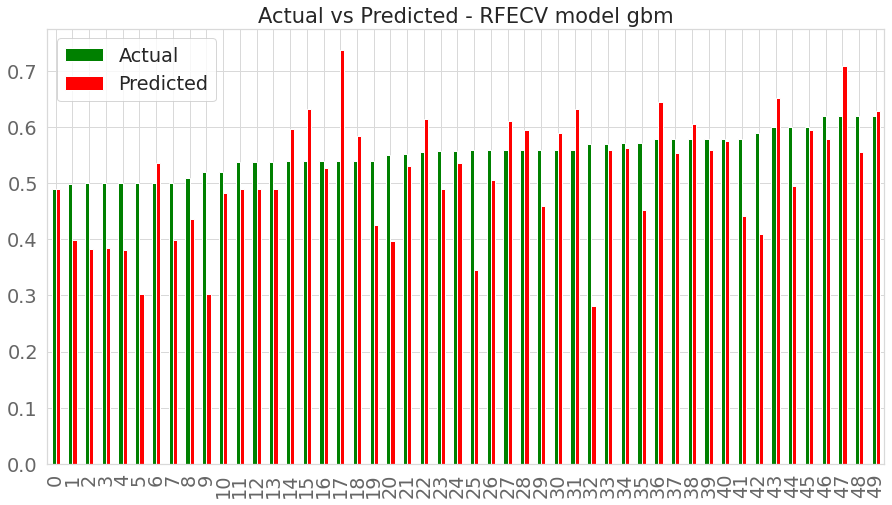

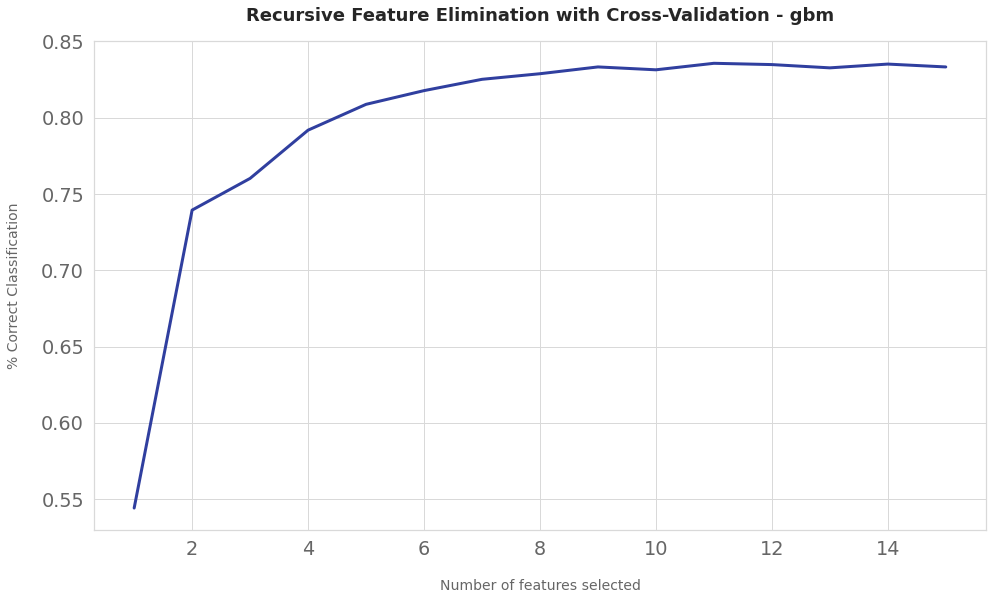

Optimal number of features: 11
xgb...
       Actual  Predicted       MAPE
0   0.490000   0.529321   8.024882
1   0.498000   0.373977  24.904228
2   0.499800   0.348563  30.259428
3   0.499800   0.326543  34.665354
4   0.499800   0.326543  34.665354
5   0.499800   0.305231  38.929340
6   0.499800   0.550730  10.190016
7   0.499900   0.332861  33.414565
8   0.510000   0.495385   2.865688
9   0.519801   0.305231  41.279206
10  0.519901   0.442411  14.904807
11  0.538002   0.488882   9.129935
12  0.538002   0.514690   4.332899
13  0.538002   0.514690   4.332899
14  0.539802   0.607926  12.620325
15  0.539802   0.597134  10.621003
16  0.539802   0.532296   1.390523
17  0.539802   0.755286  39.919172
18  0.539802   0.604012  11.895244
19  0.539902   0.407930  24.443636
20  0.550002   0.385515  29.906585
21  0.551802   0.545874   1.074279
22  0.556002   0.601757   8.229153
23  0.558002   0.468348  16.067032
24  0.558002   0.536839   3.792628
25  0.559802   0.360103  35.673208
26  0.559802   0

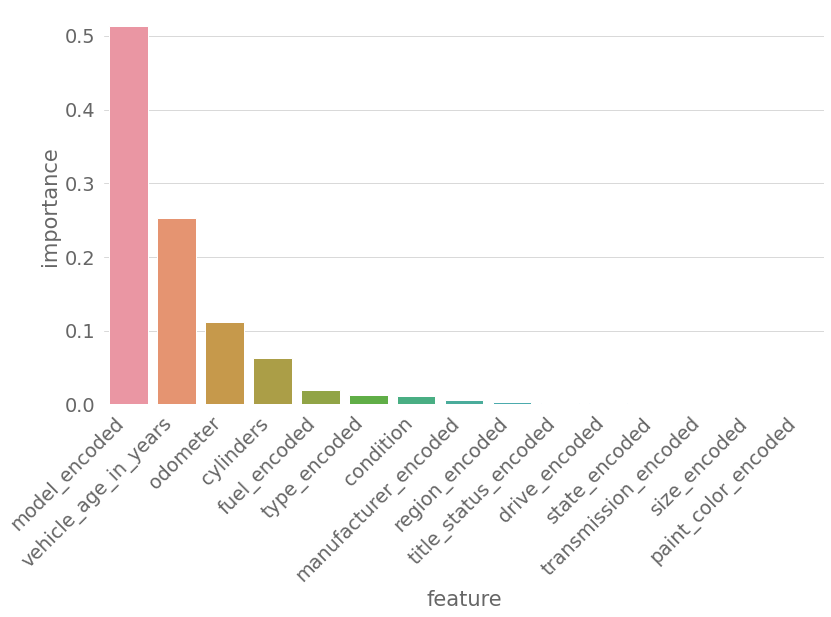

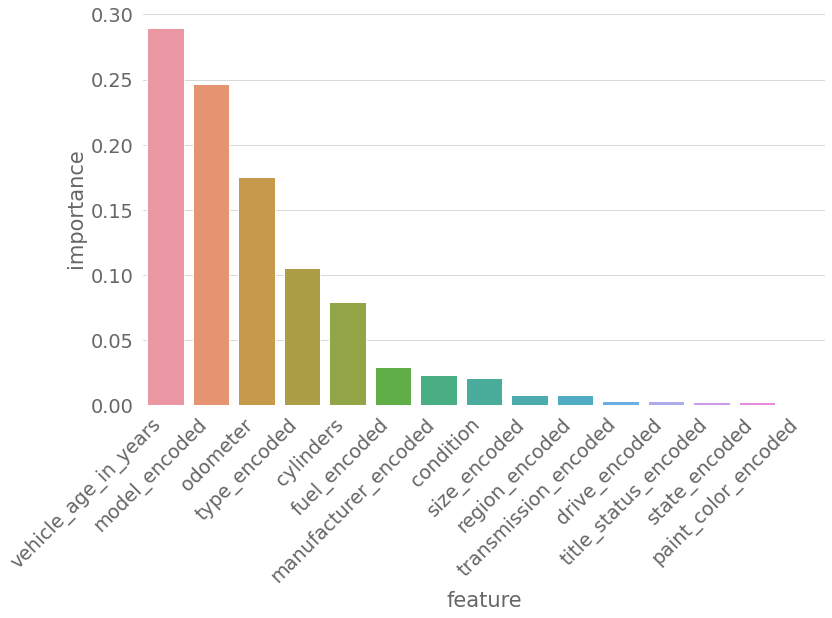

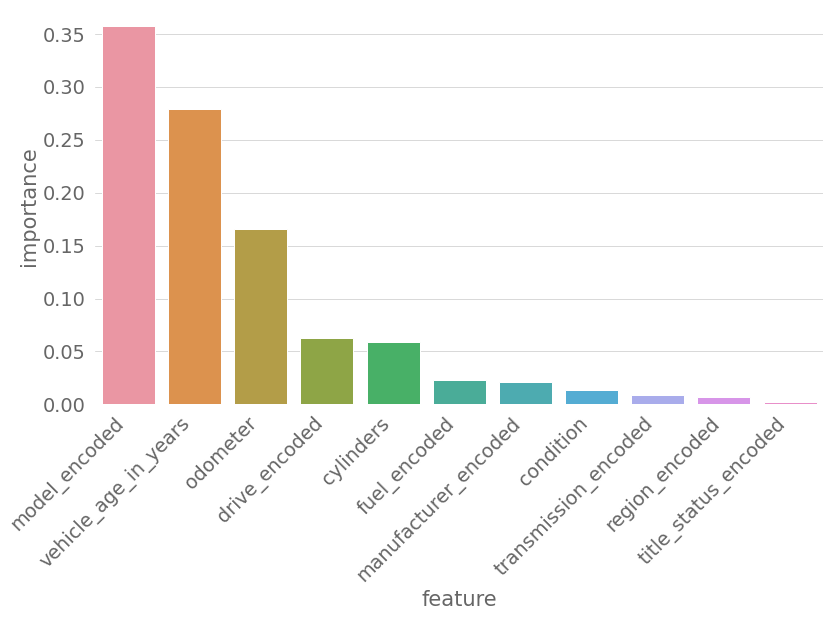

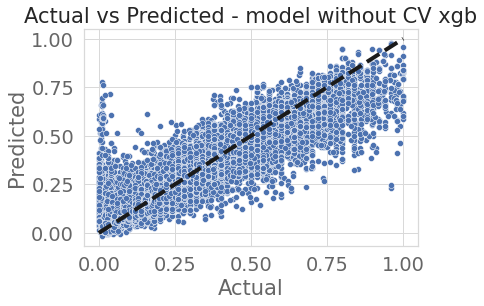

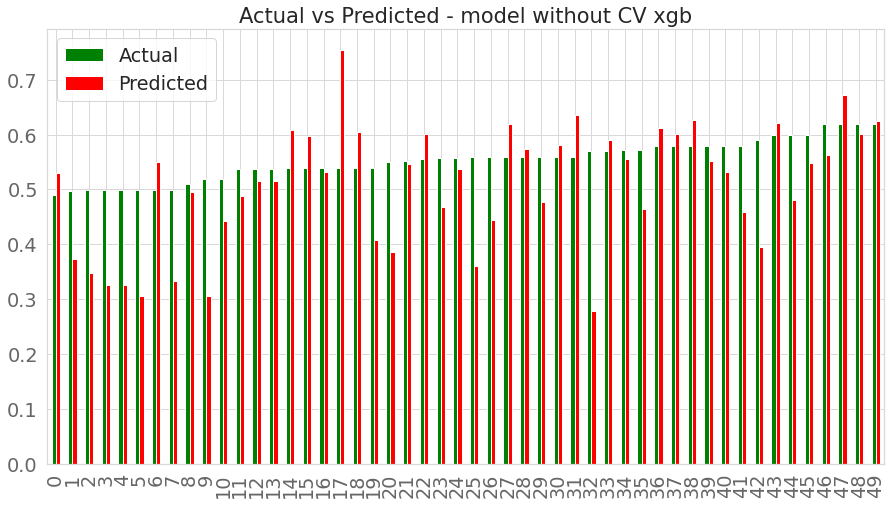

done
Now tuning XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=30, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=True, subsample=1, verbosity=1).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   32.8s finished


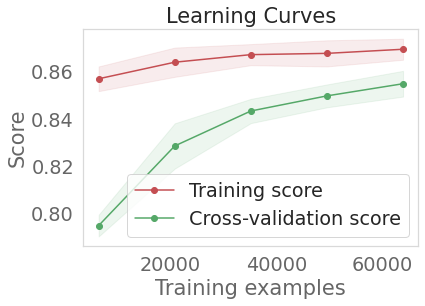

      Actual  Predicted       MAPE
0   0.490000   0.513973   4.892631
1   0.498000   0.426628  14.331667
2   0.499800   0.421173  15.731660
3   0.499800   0.421173  15.731660
4   0.499800   0.420664  15.833631
5   0.499800   0.381854  23.598728
6   0.499800   0.523413   4.724516
7   0.499900   0.428717  14.239503
8   0.510000   0.446225  12.504926
9   0.519801   0.381854  26.538482
10  0.519901   0.455202  12.444534
11  0.538002   0.483213  10.183682
12  0.538002   0.494322   8.118852
13  0.538002   0.494322   8.118852
14  0.539802   0.578902   7.243501
15  0.539802   0.613832  13.714395
16  0.539802   0.517046   4.215629
17  0.539802   0.695428  28.830234
18  0.539802   0.581074   7.645936
19  0.539902   0.477277  11.599232
20  0.550002   0.420414  23.561342
21  0.551802   0.518678   6.002888
22  0.556002   0.653881  17.604036
23  0.558002   0.519351   6.926762
24  0.558002   0.498732  10.621866
25  0.559802   0.433567  22.549972
26  0.559802   0.478891  14.453614
27  0.559802   0.609

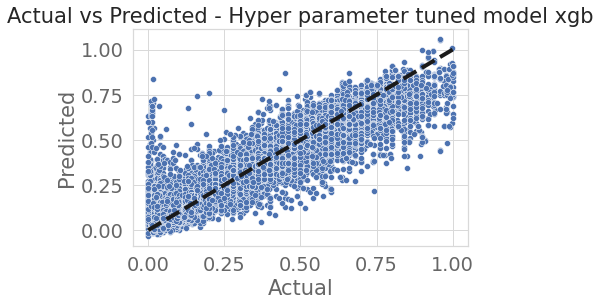

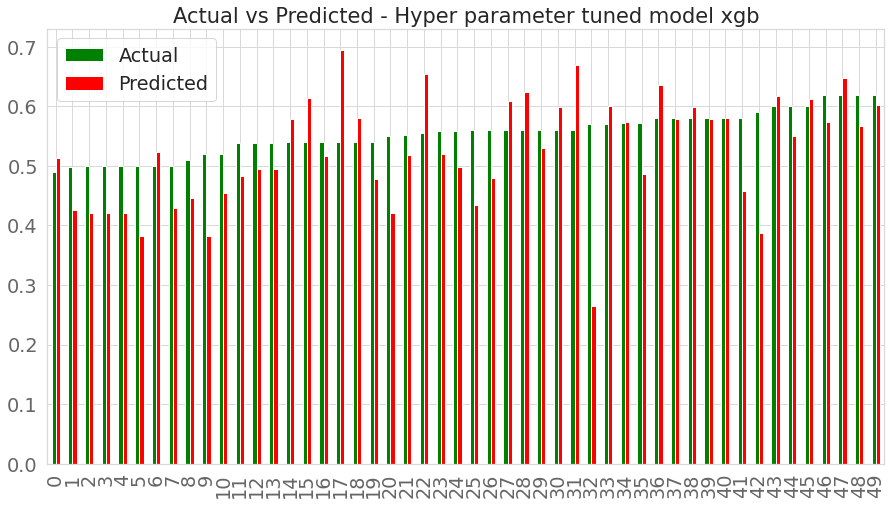

      Actual  Predicted       MAPE
0   0.490000   0.513848   4.867111
1   0.498000   0.446087  10.424276
2   0.499800   0.414084  17.150043
3   0.499800   0.405752  18.817214
4   0.499800   0.405752  18.817214
5   0.499800   0.319134  36.147605
6   0.499800   0.546866   9.417052
7   0.499900   0.417173  16.548644
8   0.510000   0.504230   1.131352
9   0.519801   0.319134  38.604506
10  0.519901   0.492242   5.320030
11  0.538002   0.460665  14.374724
12  0.538002   0.473622  11.966376
13  0.538002   0.473622  11.966376
14  0.539802   0.601940  11.511316
15  0.539802   0.568516   5.319529
16  0.539802   0.467874  13.324800
17  0.539802   0.665802  23.341908
18  0.539802   0.579127   7.285173
19  0.539902   0.532600   1.352485
20  0.550002   0.412376  25.022766
21  0.551802   0.541798   1.812983
22  0.556002   0.687763  23.697954
23  0.558002   0.527981   5.380124
24  0.558002   0.517171   7.317470
25  0.559802   0.400399  28.474870
26  0.559802   0.501853  10.351803
27  0.559802   0.596

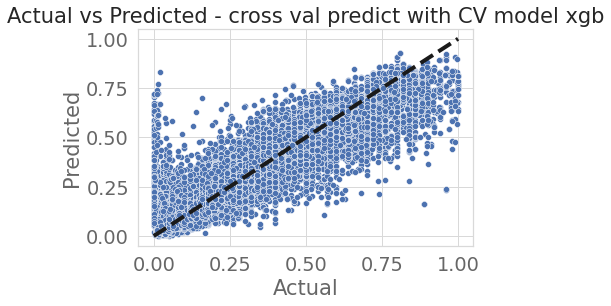

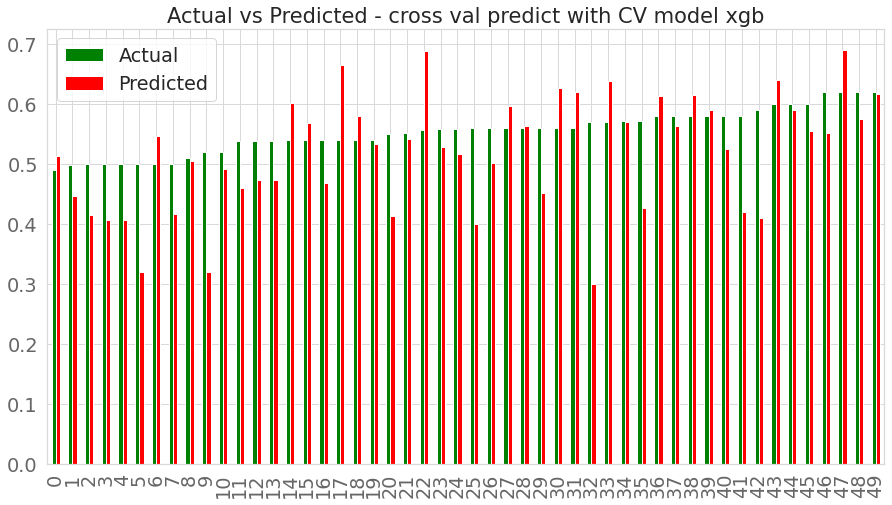

      Actual  Predicted       MAPE
0   0.490000   0.525175   7.178690
1   0.498000   0.425659  14.526321
2   0.499800   0.432564  13.452540
3   0.499800   0.440859  11.792840
4   0.499800   0.440859  11.792840
5   0.499800   0.378209  24.328014
6   0.499800   0.502331   0.506324
7   0.499900   0.434012  13.180153
8   0.510000   0.418651  17.911677
9   0.519801   0.378209  27.239707
10  0.519901   0.474114   8.806741
11  0.538002   0.471667  12.329803
12  0.538002   0.473327  12.021289
13  0.538002   0.473327  12.021289
14  0.539802   0.597191  10.631614
15  0.539802   0.572859   6.123935
16  0.539802   0.514639   4.661526
17  0.539802   0.671811  24.455213
18  0.539802   0.580791   7.593465
19  0.539902   0.493246   8.641585
20  0.550002   0.404337  26.484484
21  0.551802   0.535986   2.866257
22  0.556002   0.651313  17.142209
23  0.558002   0.524628   5.981092
24  0.558002   0.531180   4.806918
25  0.559802   0.441314  21.166114
26  0.559802   0.519969   7.115694
27  0.559802   0.579

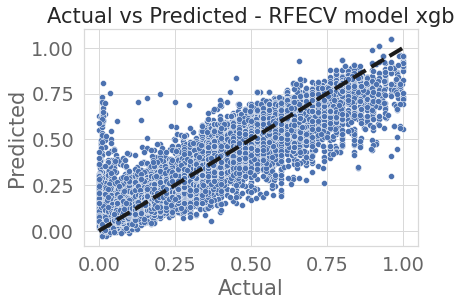

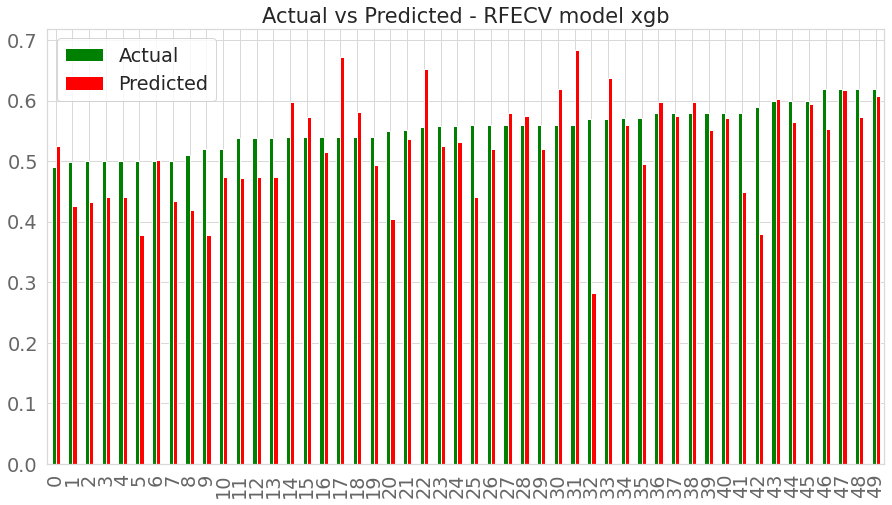

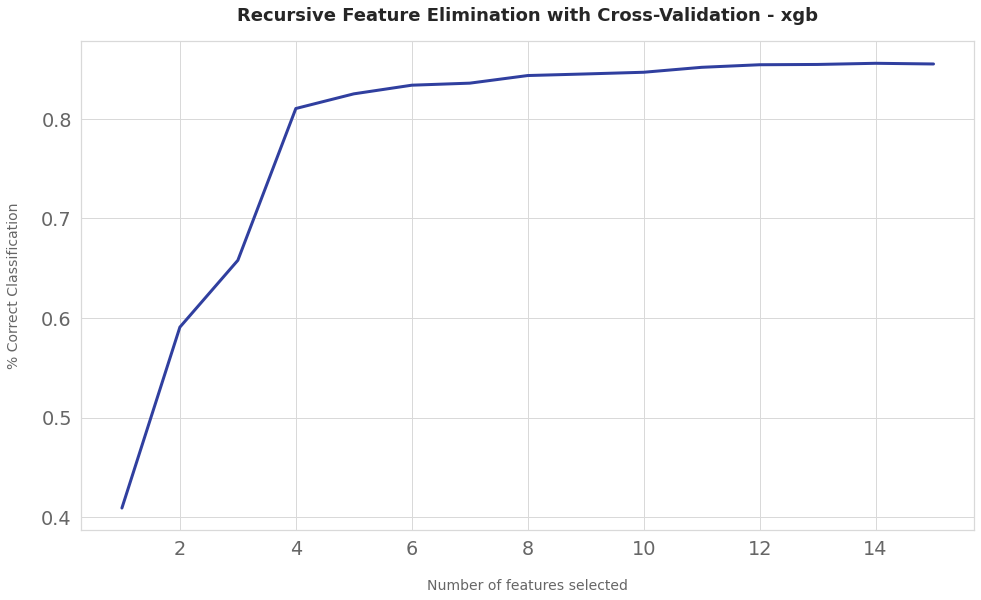

Optimal number of features: 14
bagging...
       Actual  Predicted          MAPE
0   0.490000   0.557428  1.376097e+01
1   0.498000   0.360198  2.767099e+01
2   0.499800   0.499801  1.290891e-04
3   0.499800   0.499801  1.290891e-04
4   0.499800   0.499801  1.290891e-04
5   0.499800   0.499800  1.110667e-14
6   0.499800   0.499801  1.715040e-04
7   0.499900   0.426687  1.464551e+01
8   0.510000   0.463823  9.054473e+00
9   0.519801   0.519801  2.135863e-14
10  0.519901   0.481021  7.478264e+00
11  0.538002   0.497420  7.543069e+00
12  0.538002   0.539536  2.851407e-01
13  0.538002   0.539536  2.851407e-01
14  0.539802   0.539802  4.113449e-14
15  0.539802   0.539802  4.113449e-14
16  0.539802   0.539802  4.113449e-14
17  0.539802   0.539802  4.113449e-14
18  0.539802   0.539802  4.113449e-14
19  0.539902   0.359804  3.335754e+01
20  0.550002   0.396359  2.793508e+01
21  0.551802   0.551802  2.011995e-14
22  0.556002   0.538690  3.113781e+00
23  0.558002   0.534791  4.159647e+00
24  0.5

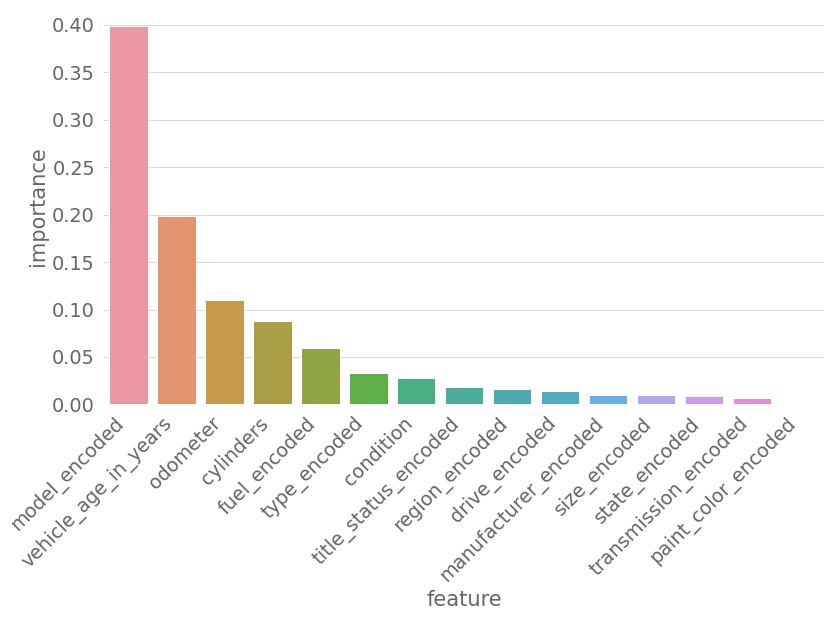

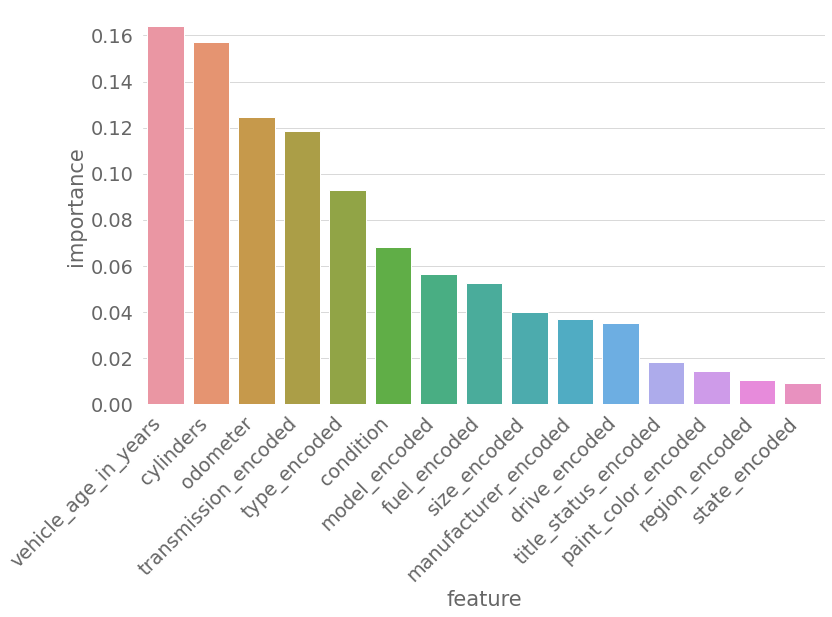

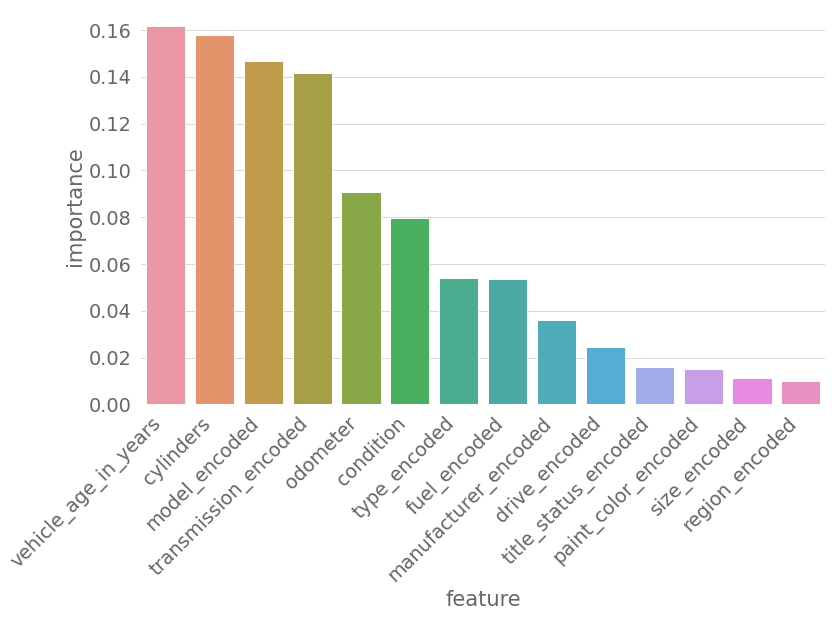

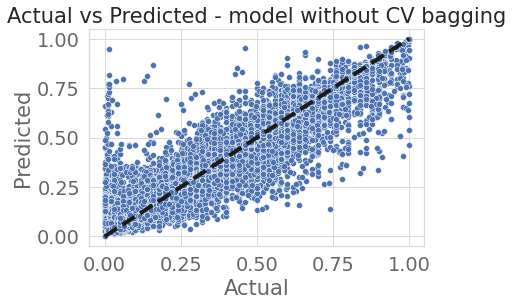

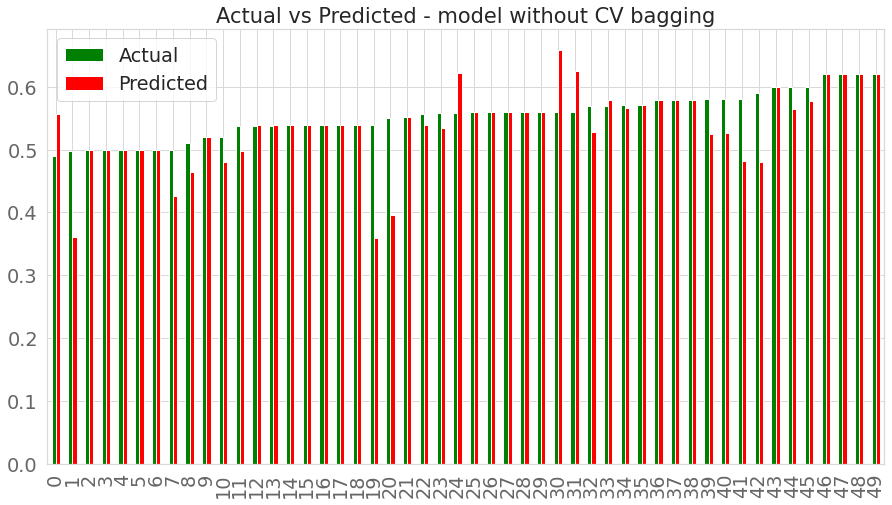

done
Now tuning BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.4min finished


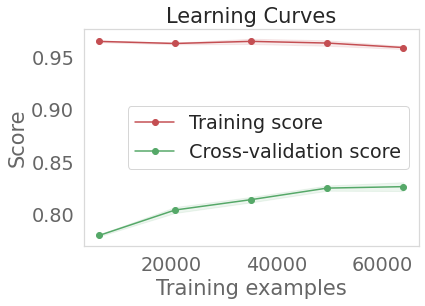

      Actual  Predicted       MAPE
0   0.490000   0.375226  23.423165
1   0.498000   0.396938  20.293514
2   0.499800   0.456781   8.607142
3   0.499800   0.456321   8.699266
4   0.499800   0.451501   9.663725
5   0.499800   0.448866  10.190915
6   0.499800   0.476096   4.742661
7   0.499900   0.341063  31.773692
8   0.510000   0.394699  22.608084
9   0.519801   0.459183  11.661665
10  0.519901   0.398026  23.442010
11  0.538002   0.489643   8.988525
12  0.538002   0.496406   7.731500
13  0.538002   0.496406   7.731500
14  0.539802   0.516845   4.252738
15  0.539802   0.517255   4.176819
16  0.539802   0.516036   4.402683
17  0.539802   0.530988   1.632795
18  0.539802   0.546860   1.307567
19  0.539902   0.359763  33.365115
20  0.550002   0.392802  28.581750
21  0.551802   0.520171   5.732340
22  0.556002   0.517607   6.905557
23  0.558002   0.456723  18.150424
24  0.558002   0.415662  25.508956
25  0.559802   0.480419  14.180617
26  0.559802   0.520436   7.032154
27  0.559802   0.545

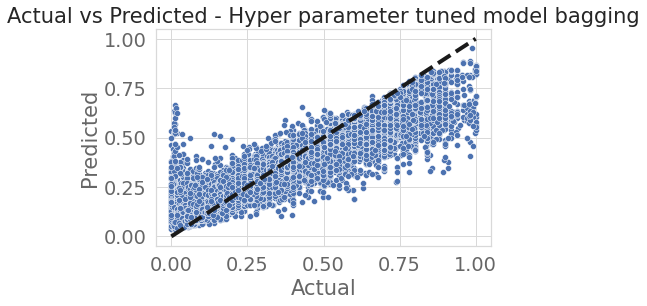

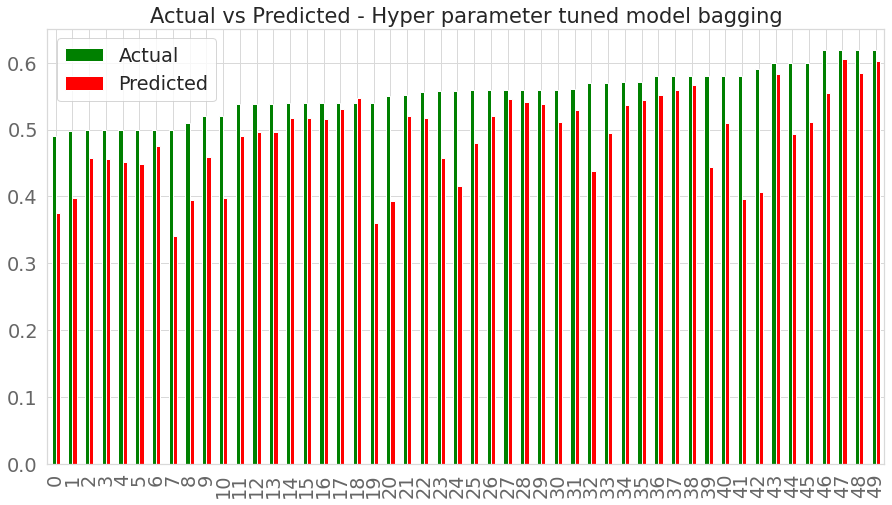

      Actual  Predicted       MAPE
0   0.490000   0.439221  10.363019
1   0.498000   0.401501  19.377251
2   0.499800   0.424859  14.994103
3   0.499800   0.420215  15.923395
4   0.499800   0.423575  15.251151
5   0.499800   0.425335  14.898861
6   0.499800   0.468191   6.324277
7   0.499900   0.320699  35.847452
8   0.510000   0.406450  20.303987
9   0.519801   0.432609  16.774010
10  0.519901   0.454023  12.671221
11  0.538002   0.504054   6.309895
12  0.538002   0.525952   2.239671
13  0.538002   0.525952   2.239671
14  0.539802   0.531008   1.628949
15  0.539802   0.518154   4.010362
16  0.539802   0.492457   8.770749
17  0.539802   0.568407   5.299165
18  0.539802   0.552152   2.287968
19  0.539902   0.366275  32.158964
20  0.550002   0.400923  27.105161
21  0.551802   0.528022   4.309499
22  0.556002   0.595906   7.176947
23  0.558002   0.447460  19.810383
24  0.558002   0.446587  19.966757
25  0.559802   0.456129  18.519573
26  0.559802   0.482357  13.834400
27  0.559802   0.559

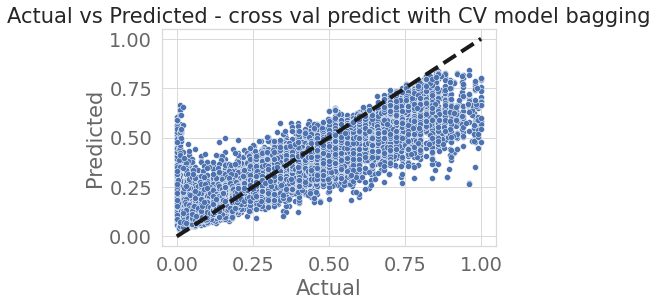

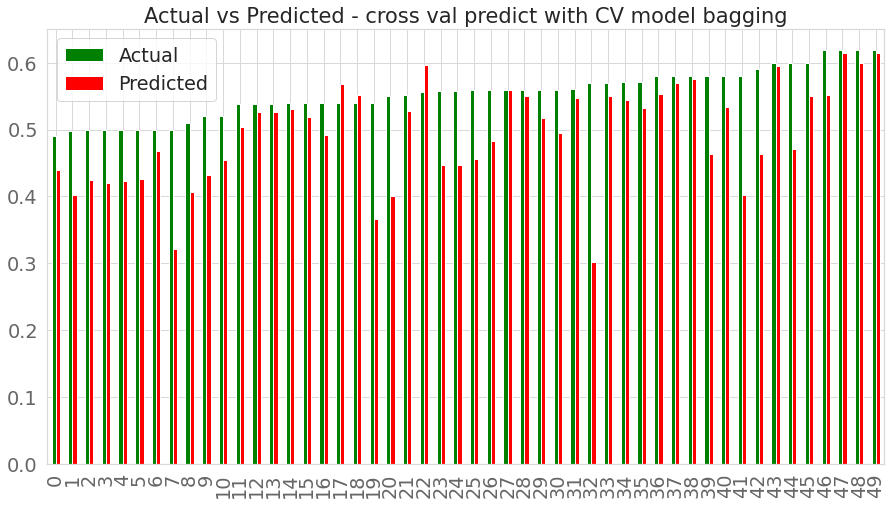

ada boost...
       Actual  Predicted       MAPE
0   0.490000   0.449485   8.268267
1   0.498000   0.390145  21.657600
2   0.499800   0.390145  21.939757
3   0.499800   0.390145  21.939757
4   0.499800   0.365891  26.792583
5   0.499800   0.273674  45.243394
6   0.499800   0.484788   3.003504
7   0.499900   0.351264  29.733145
8   0.510000   0.420133  17.620968
9   0.519801   0.273674  47.350309
10  0.519901   0.483339   7.032383
11  0.538002   0.482730  10.273562
12  0.538002   0.483339  10.160220
13  0.538002   0.483339  10.160220
14  0.539802   0.520348   3.603858
15  0.539802   0.520348   3.603858
16  0.539802   0.496352   8.049180
17  0.539802   0.605537  12.177685
18  0.539802   0.494158   8.455668
19  0.539902   0.355002  34.246906
20  0.550002   0.483339  12.120432
21  0.551802   0.484788  12.144498
22  0.556002   0.494158  11.123062
23  0.558002   0.484788  13.120705
24  0.558002   0.494158  11.441629
25  0.559802   0.430616  23.077073
26  0.559802   0.405331  27.593965
27  0.

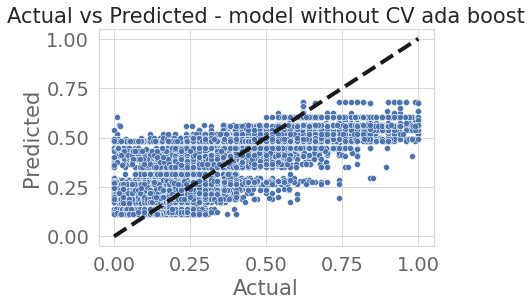

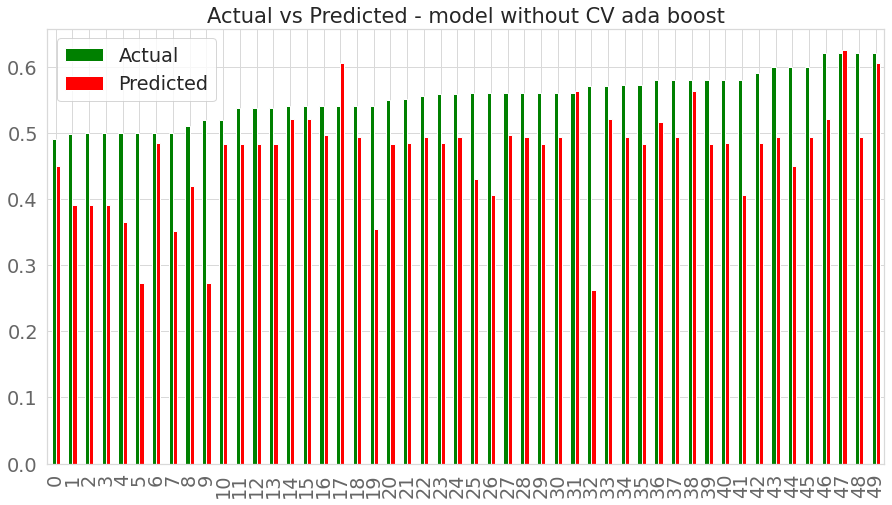

done
Now tuning AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   18.4s finished


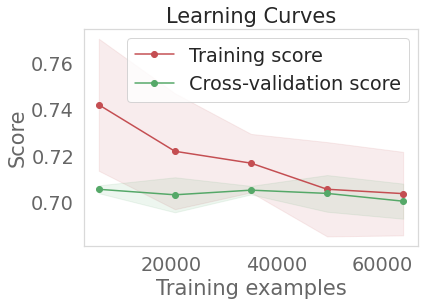

      Actual  Predicted       MAPE
0   0.490000   0.435330  11.156980
1   0.498000   0.273772  45.025623
2   0.499800   0.286451  42.686797
3   0.499800   0.281600  43.657458
4   0.499800   0.255421  48.895274
5   0.499800   0.273772  45.223617
6   0.499800   0.503493   0.738808
7   0.499900   0.274470  45.094926
8   0.510000   0.398630  21.837332
9   0.519801   0.273772  47.331293
10  0.519901   0.487935   6.148376
11  0.538002   0.473173  12.049841
12  0.538002   0.481982  10.412549
13  0.538002   0.481982  10.412549
14  0.539802   0.528578   2.079158
15  0.539802   0.534135   1.049845
16  0.539802   0.518806   3.889478
17  0.539802   0.600061  11.163295
18  0.539802   0.584224   8.229393
19  0.539902   0.378018  29.983924
20  0.550002   0.384433  30.103410
21  0.551802   0.529765   3.993684
22  0.556002   0.551358   0.835274
23  0.558002   0.398630  28.561243
24  0.558002   0.483698  13.316179
25  0.559802   0.403646  27.894837
26  0.559802   0.257278  54.041248
27  0.559802   0.507

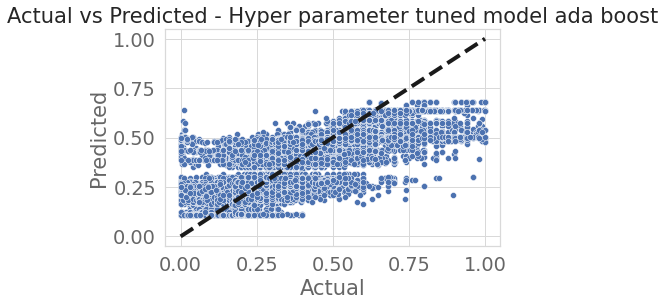

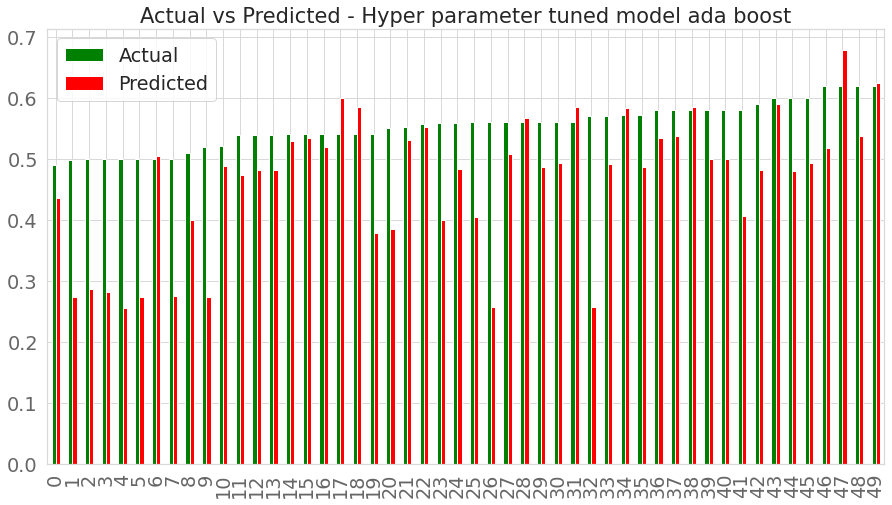

      Actual  Predicted       MAPE
0   0.490000   0.423411  13.589543
1   0.498000   0.273276  45.125272
2   0.499800   0.299177  40.140642
3   0.499800   0.294576  41.061135
4   0.499800   0.294576  41.061135
5   0.499800   0.279996  43.978434
6   0.499800   0.532281   6.498706
7   0.499900   0.385832  22.818165
8   0.510000   0.410930  19.425484
9   0.519801   0.279996  46.134022
10  0.519901   0.520683   0.150377
11  0.538002   0.415697  22.733204
12  0.538002   0.433534  19.417638
13  0.538002   0.433534  19.417638
14  0.539802   0.480963  10.900041
15  0.539802   0.603434  11.788022
16  0.539802   0.499793   7.411713
17  0.539802   0.603434  11.788022
18  0.539802   0.596393  10.483823
19  0.539902   0.423411  21.576284
20  0.550002   0.296009  46.180380
21  0.551802   0.532281   3.537781
22  0.556002   0.596393   7.264574
23  0.558002   0.490265  12.139252
24  0.558002   0.505872   9.342314
25  0.559802   0.313599  43.980327
26  0.559802   0.388200  30.654056
27  0.559802   0.499

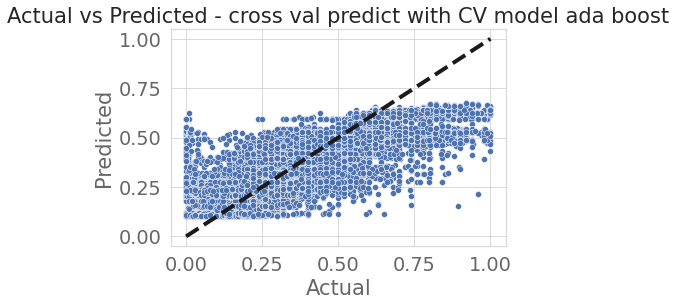

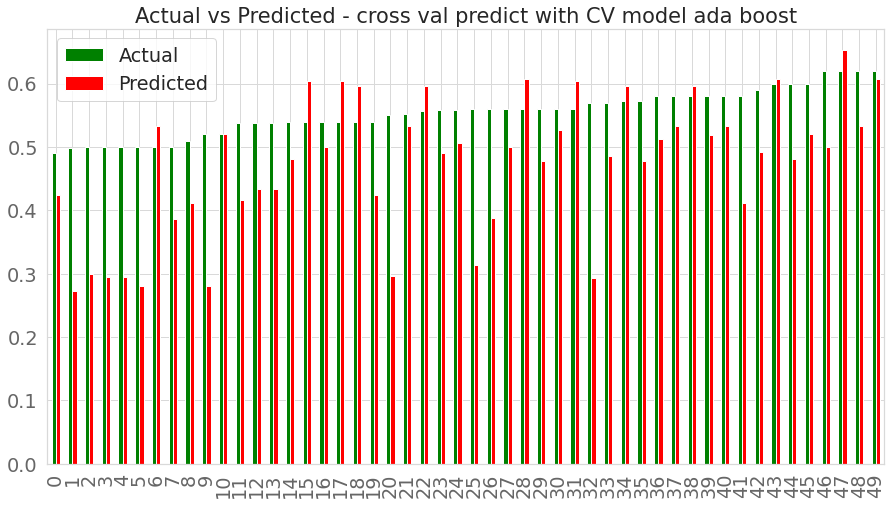

DTC...
       Actual  Predicted          MAPE
0   0.490000   0.590004  2.040900e+01
1   0.498000   0.309992  3.775252e+01
2   0.499800   0.499800  1.110667e-14
3   0.499800   0.499800  1.110667e-14
4   0.499800   0.499800  1.110667e-14
5   0.499800   0.499800  0.000000e+00
6   0.499800   0.499800  1.110667e-14
7   0.499900   0.478999  4.181003e+00
8   0.510000   0.519901  1.941253e+00
9   0.519801   0.519801  2.135863e-14
10  0.519901   0.499900  3.847042e+00
11  0.538002   0.538002  0.000000e+00
12  0.538002   0.538002  0.000000e+00
13  0.538002   0.538002  0.000000e+00
14  0.539802   0.539802  4.113449e-14
15  0.539802   0.539802  4.113449e-14
16  0.539802   0.539802  4.113449e-14
17  0.539802   0.539802  4.113449e-14
18  0.539802   0.539802  4.113449e-14
19  0.539902   0.039982  9.259465e+01
20  0.550002   0.469999  1.454598e+01
21  0.551802   0.551802  4.023990e-14
22  0.556002   0.594937  7.002650e+00
23  0.558002   0.558002  0.000000e+00
24  0.558002   0.578003  3.584358e+00
25  

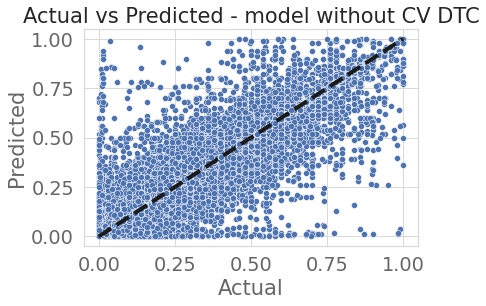

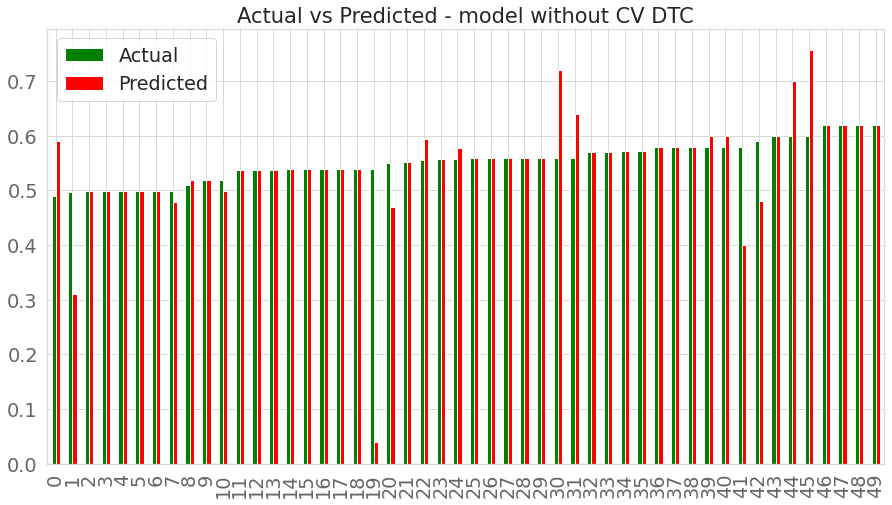

done
Now tuning DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best').
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   42.5s finished


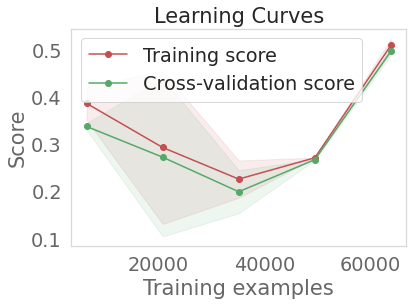

      Actual  Predicted       MAPE
0   0.490000   0.187333  61.768678
1   0.498000   0.352338  29.249428
2   0.499800   0.352338  29.504243
3   0.499800   0.352338  29.504243
4   0.499800   0.352338  29.504243
5   0.499800   0.352338  29.504243
6   0.499800   0.352338  29.504243
7   0.499900   0.344364  31.113363
8   0.510000   0.147558  71.067027
9   0.519801   0.352338  32.216766
10  0.519901   0.344364  33.763460
11  0.538002   0.352338  34.509890
12  0.538002   0.352338  34.509890
13  0.538002   0.352338  34.509890
14  0.539802   0.352338  34.728279
15  0.539802   0.344364  36.205394
16  0.539802   0.352338  34.728279
17  0.539802   0.344364  36.205394
18  0.539802   0.495344   8.235895
19  0.539902   0.344364  36.217211
20  0.550002   0.231069  57.987540
21  0.551802   0.495344  10.231562
22  0.556002   0.352338  36.630149
23  0.558002   0.352338  36.857289
24  0.558002   0.187333  66.427859
25  0.559802   0.352338  37.060328
26  0.559802   0.352338  37.060328
27  0.559802   0.352

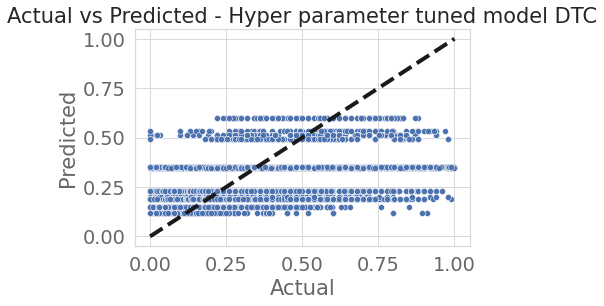

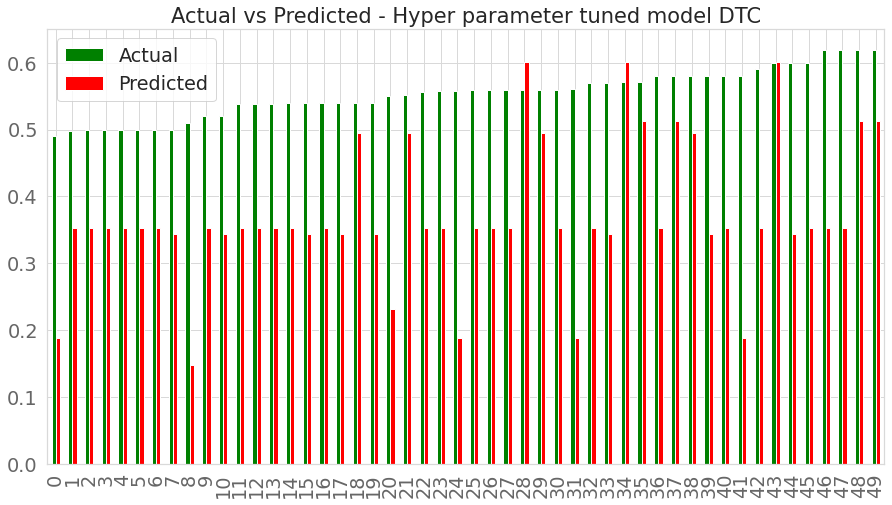

      Actual  Predicted       MAPE
0   0.490000   0.222164  54.660343
1   0.498000   0.387978  22.092711
2   0.499800   0.336582  32.656660
3   0.499800   0.336582  32.656660
4   0.499800   0.336582  32.656660
5   0.499800   0.336582  32.656660
6   0.499800   0.336582  32.656660
7   0.499900   0.222164  55.558284
8   0.510000   0.222164  56.438439
9   0.519801   0.336582  35.247885
10  0.519901   0.387978  25.374564
11  0.538002   0.589087   9.495448
12  0.538002   0.589087   9.495448
13  0.538002   0.589087   9.495448
14  0.539802   0.589087   9.130314
15  0.539802   0.764820  41.685437
16  0.539802   0.336582  37.647089
17  0.539802   0.589087   9.130314
18  0.539802   0.589087   9.130314
19  0.539902   0.222164  58.850995
20  0.550002   0.387978  29.458759
21  0.551802   0.589087   6.756970
22  0.556002   0.589087   5.950504
23  0.558002   0.387978  30.470139
24  0.558002   0.222164  60.185804
25  0.559802   0.336582  39.874854
26  0.559802   0.589087   5.231271
27  0.559802   0.589

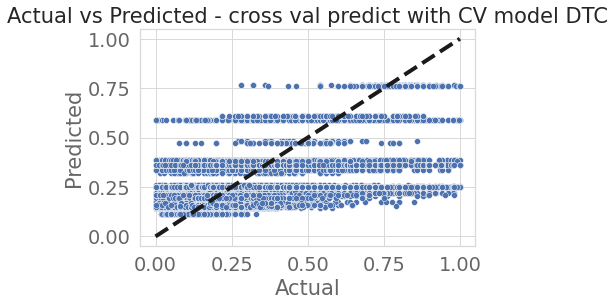

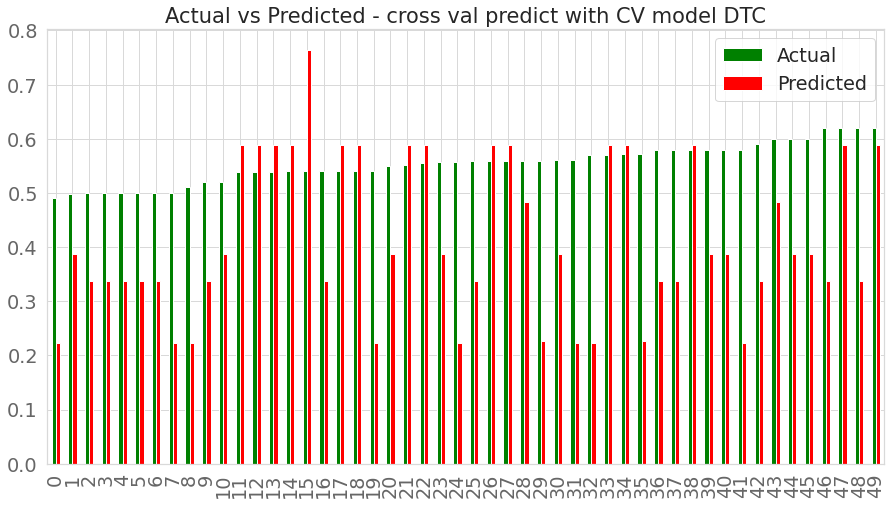

knn...
       Actual  Predicted       MAPE
0   0.490000   0.504634   2.986516
1   0.498000   0.596531  19.785266
2   0.499800   0.499800   0.000000
3   0.499800   0.499800   0.000000
4   0.499800   0.499800   0.000000
5   0.499800   0.473132   5.335681
6   0.499800   0.486466   2.667841
7   0.499900   0.519901   4.000960
8   0.510000   0.143146  71.932233
9   0.519801   0.473132   8.978157
10  0.519901   0.662006  27.333231
11  0.538002   0.538002   0.000000
12  0.538002   0.538002   0.000000
13  0.538002   0.538002   0.000000
14  0.539802   0.539802   0.000000
15  0.539802   0.539802   0.000000
16  0.539802   0.539802   0.000000
17  0.539802   0.539802   0.000000
18  0.539802   0.561136   3.952227
19  0.539902   0.299792  44.472846
20  0.550002   0.399263  27.407057
21  0.551802   0.507800   7.974193
22  0.556002   0.555936   0.011991
23  0.558002   0.665873  19.331637
24  0.558002   0.576630   3.338232
25  0.559802   0.559802   0.000000
26  0.559802   0.559802   0.000000
27  0.559802

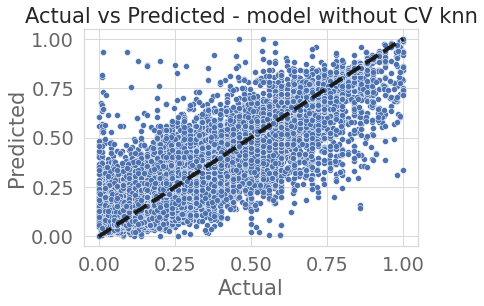

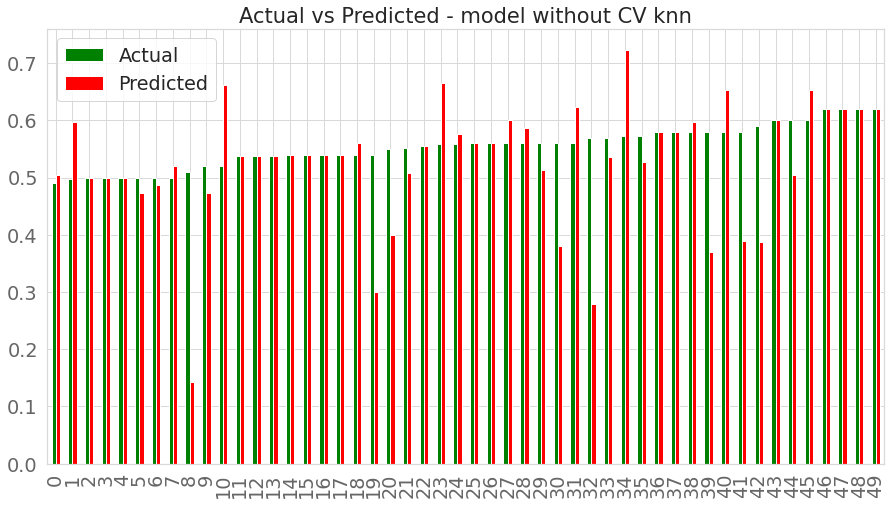

done
random forest...
       Actual  Predicted       MAPE
0   0.490000   0.515648   5.234471
1   0.498000   0.288294  42.109566
2   0.499800   0.409250  18.117261
3   0.499800   0.389319  22.105101
4   0.499800   0.385017  22.965815
5   0.499800   0.290970  41.782768
6   0.499800   0.472198   5.522589
7   0.499900   0.365179  26.949545
8   0.510000   0.341374  33.063948
9   0.519801   0.290970  44.022840
10  0.519901   0.367789  29.257775
11  0.538002   0.473093  12.064681
12  0.538002   0.603079  12.096202
13  0.538002   0.603079  12.096202
14  0.539802   0.487851   9.624054
15  0.539802   0.492597   8.744835
16  0.539802   0.600397  11.225404
17  0.539802   0.668789  23.895255
18  0.539802   0.606445  12.345895
19  0.539902   0.377777  30.028508
20  0.550002   0.217069  60.533095
21  0.551802   0.579819   5.077293
22  0.556002   0.543019   2.335115
23  0.558002   0.366782  34.268682
24  0.558002   0.515648   7.590261
25  0.559802   0.325732  41.813083
26  0.559802   0.386261  31.0005

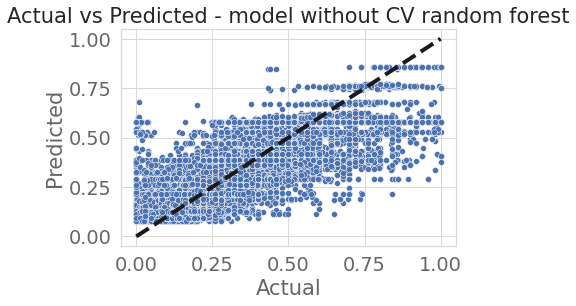

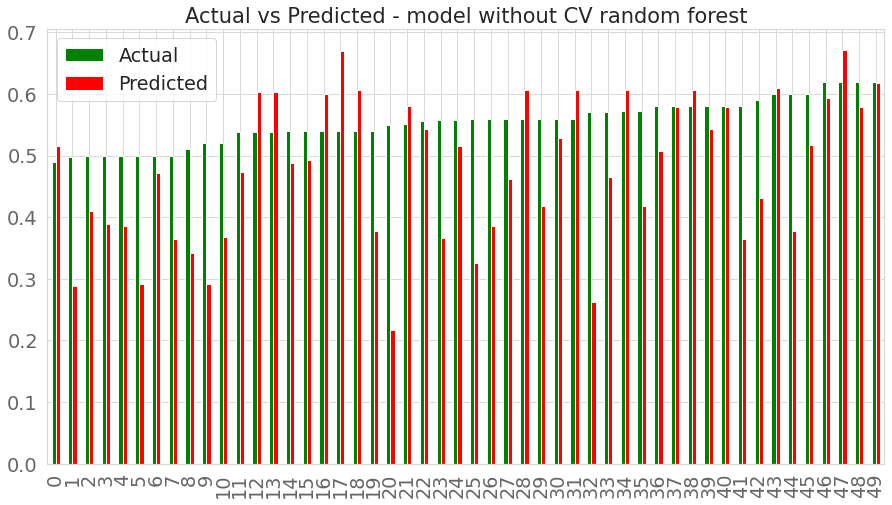

done
comparision of all models
            Model                 Techniques  ...       MSE       MAE
0           ridge     All Feature without CV  ...  0.010425  0.070277
1           ridge  Randomized Search with CV  ...  0.010425  0.070277
2           ridge          Cross val with CV  ...  0.010547  0.070412
3             sgd     All Feature without CV  ...  0.035792  0.148281
4             sgd  Randomized Search with CV  ...  0.010488  0.070927
5             sgd          Cross val with CV  ...  0.011538  0.075121
6          mlp-nn     All Feature without CV  ...  0.006066  0.051404
7          mlp-nn  Randomized Search with CV  ...  0.008874  0.060815
8          mlp-nn          Cross val with CV  ...  0.009861  0.066061
9             gbm     All Feature without CV  ...  0.006340  0.052015
10            gbm  Randomized Search with CV  ...  0.006283  0.050402
11            gbm          Cross val with CV  ...  0.006774  0.052458
12            gbm                RFE with CV  ...  0.006151

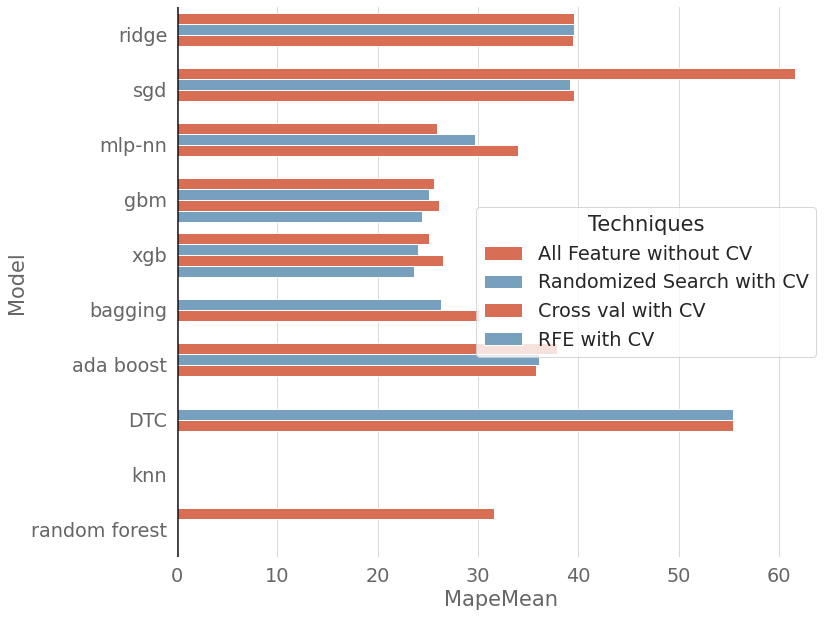

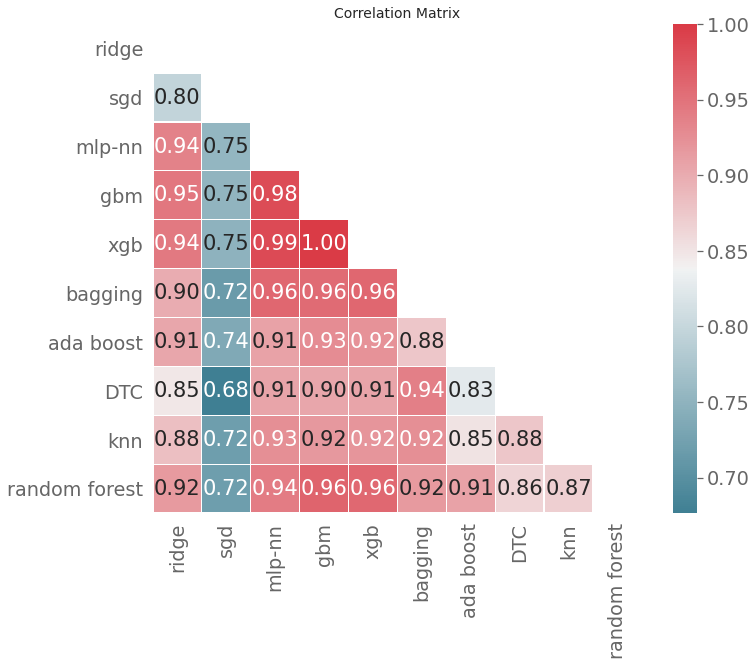

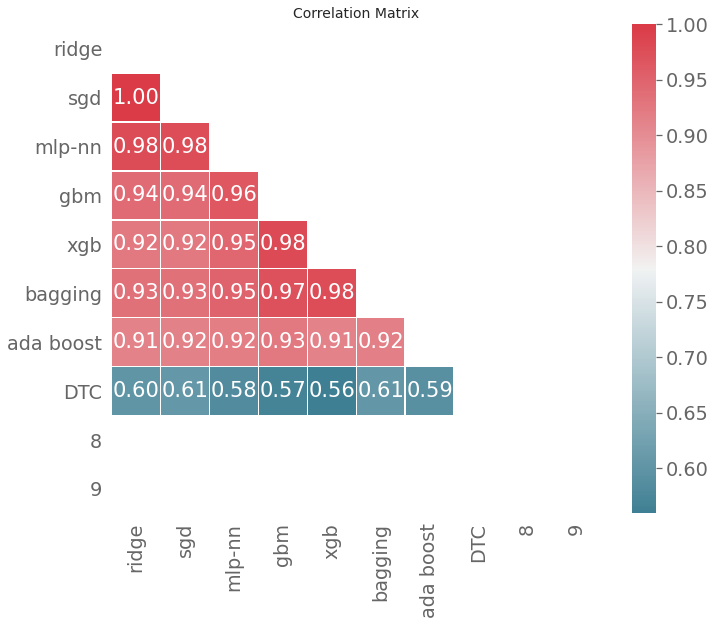

0
1
2
3
4
5
6
7
      Actual  Predicted       MAPE
0   0.490000   0.406473  17.046298
1   0.498000   0.384741  22.742771
2   0.499800   0.406142  18.739137
3   0.499800   0.400830  19.801936
4   0.499800   0.395041  20.960201
5   0.499800   0.354876  28.996390
6   0.499800   0.498283   0.303431
7   0.499900   0.322343  35.518477
8   0.510000   0.380869  25.319784
9   0.519801   0.355739  31.562497
10  0.519901   0.411772  20.798002
11  0.538002   0.484654   9.915775
12  0.538002   0.542482   0.832720
13  0.538002   0.542482   0.832720
14  0.539802   0.608072  12.647279
15  0.539802   0.620184  14.891084
16  0.539802   0.543549   0.694192
17  0.539802   0.652230  20.827688
18  0.539802   0.583043   8.010654
19  0.539902   0.343516  36.374369
20  0.550002   0.403450  26.645716
21  0.551802   0.499418   9.493330
22  0.556002   0.557313   0.235680
23  0.558002   0.454096  18.621158
24  0.558002   0.443341  20.548614
25  0.559802   0.399166  28.695205
26  0.559802   0.523976   6.399902
27  

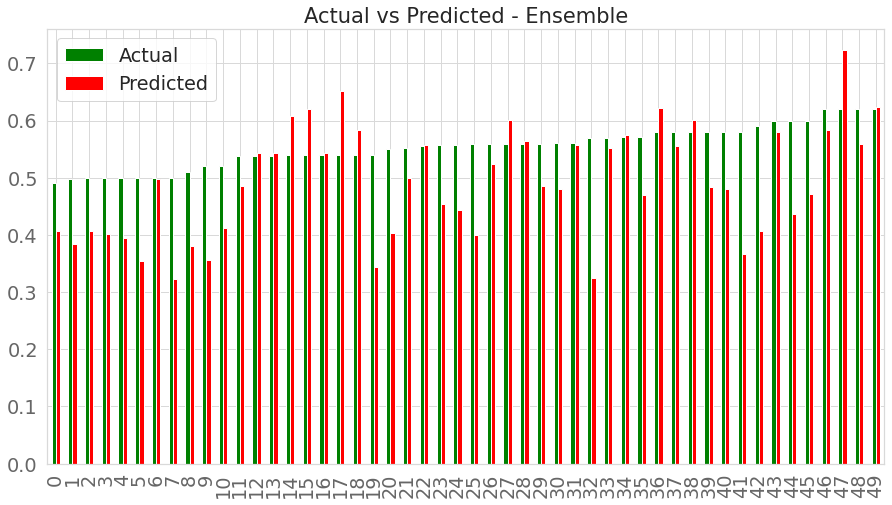

Done.



In [53]:
model.regressMultipleModels(predictorTrain, predictorTest, targetTrain, targetTest, 10)